# Numbers & Logic in Computers
### What Every Computational Seismologist Needs to Know

Computational Seismology — Spring 2026  
Glenn Thompson


## Slide 2 — Why This Matters

**Computers are fast, not exact**

If you’ve ever asked:
- “Why does my spectrogram look wrong?”
- “Why did RSAM drift over time?”
- “Why did my HPC job fail but my laptop run?”
- “Why do float32 and float64 give different results?”

👉 This lecture explains *why*.


## Slide 3 — What We Will (and Won’t) Do

**Today (1 hour):**
- How numbers are represented in computers
- Why precision, overflow, and rounding matter
- Boolean logic as used in seismic workflows

**We will NOT:**
- Do manual binary arithmetic
- Design logic gates
- Memorise IEEE standards

This is **numerical survival**, not computer engineering.


## Slide 4 — The Core Idea

> Computers do **not** represent real numbers  
> They represent **approximations**

This has consequences for:
- Seismic amplitudes
- Spectra
- Long time series
- Detection & classification
- Machine learning


## Slide 5 — Integers vs Floating Point

**Two very different number types**

- **Integers**
  - Exact
  - Limited range
  - Used for raw digitizer counts

- **Floating point**
  - Approximate
  - Huge dynamic range
  - Used for processing & analysis

Most numerical problems happen **after** conversion to floats.


In [ ]:
# TODO: Add a small demo comparing int vs float behavior
# e.g., show dtype, range, and what happens on casting


0


# Declaring and Assigning Variables (and Constants)
In some languages, you have to declare a variable, before you can assign it a value. In Python you can declare a variable, but it will ALWAYS be assigned a default value.

In [ ]:

i = int()
print(i)
print(type(i))

f = float()
print(f)
print(type(f))


i= 0
f= 0.0


But more typically, a variable will be declared and initialized at the same time:

In [10]:
i = 5
print(i)
print(type(i))

f = 8.74
print(f)
print(type(f))


5
<class 'int'>
8.74
<class 'float'>


Strictly speaking, a variable (like i and f here) is a name that is bound to an object.
An object is an instance of a class.

Here, i is a name bound to an object of class int, and f is a name bound to an object of class float.

The class int describes how integers are represented internally in Python and which operations can be applied to them (e.g. addition, subtraction, multiplication, division).

For now, you can think of a class as a data type with behaviour. Python has built-in classes such as int and float, and you can also define your own classes — this is the basis of object-oriented programming (OOP).

In [11]:

import numpy as np

# Integers are exact
i = np.int32(1)
print("Integer arithmetic:")
print(i + 1)
print(i + 2)


Integer arithmetic:
2
3


## **SLIDE: How Integers and Floats Are Stored in Memory**

### Python Scalars (built-in `int`, `float`)

* Stored as **heap-allocated objects**
* Each value has:

  * Object header (metadata)
  * Pointer to its class
  * Numeric payload

**`int`**

* Arbitrary precision
* Stored as a variable-length array of machine words
* Never overflows
* Slow and memory-heavy

**`float`**

* Wraps a **64-bit IEEE-754 double**
* Fixed precision and range
* Can overflow / underflow
* Still has object overhead

> **Python numbers are objects, not raw machine values**

---

### NumPy Scalars & Arrays (`np.int32`, `np.float32`, `np.float64`)

* Stored as **raw C values**
* Fixed size
* No object per element
* Packed contiguously in memory (arrays)

**Consequences**

* Much faster
* Much smaller
* Can overflow, underflow, and lose precision
* Behave like C / Fortran numbers

> **NumPy removes Python’s safety net for performance**

---

### One-line takeaway

> **Python scalars are objects; NumPy numbers are bits.**

---

---

## **Jupyter Notebook Demo Cell**



In [13]:
import sys
import numpy as np

print("=== Python built-in scalars (object sizes) ===")
py_int = 5
py_float = 5.0
print("py_int   :", type(py_int),   "getsizeof:", sys.getsizeof(py_int),   "bytes")
print("py_float :", type(py_float), "getsizeof:", sys.getsizeof(py_float), "bytes")

print("\n=== NumPy scalars (object sizes vs payload sizes) ===")
np_i32 = np.int32(5)
np_f32 = np.float32(5.0)
np_f64 = np.float64(5.0)

for x in [np_i32, np_f32, np_f64]:
    print(f"{type(x)}  getsizeof:{sys.getsizeof(x):>3} bytes   dtype:{x.dtype}   itemsize:{x.itemsize} bytes")

print("\n=== Arrays: where NumPy is actually efficient (raw buffer sizes) ===")
N = 1_000_000
arr_py_ints = [1] * N                 # list of Python ints (object references)
arr_i32 = np.ones(N, dtype=np.int32)  # contiguous C buffer
arr_f32 = np.ones(N, dtype=np.float32)
arr_f64 = np.ones(N, dtype=np.float64)

print("Python list of ints:")
print("  getsizeof(list container):", sys.getsizeof(arr_py_ints), "bytes")
print("  plus N object refs (not counted here) + N Python int objects (not counted here)")

print("NumPy arrays (raw numeric storage):")
print("  int32  nbytes:", arr_i32.nbytes, "bytes   itemsize:", arr_i32.itemsize)
print("  float32 nbytes:", arr_f32.nbytes, "bytes   itemsize:", arr_f32.itemsize)
print("  float64 nbytes:", arr_f64.nbytes, "bytes   itemsize:", arr_f64.itemsize)

print("\n=== Integer overflow (NumPy behaves like C) ===")
print("np.int32 max + 1 =", np.int32(2**31 - 1) + np.int32(1))

print("\n=== Float32 precision boundary demo (this WILL show failure) ===")
a32 = np.float32(2**24)   # 16,777,216 : float32 can represent this exactly
print("a32:", a32)
print("a32 + 1 == a32 ?", (a32 + np.float32(1)) == a32, "  (float32 cannot represent +1 here)")
print("a32 + 2 - a32  =", (a32 + np.float32(2)) - a32, "  (but +2 is representable)")

print("\nCompare with float64:")
a64 = np.float64(2**24)
print("a64 + 1 - a64 =", (a64 + 1.0) - a64)

print("\n=== Floating-point classic surprise (optional) ===")
print("0.1 + 0.2 == 0.3 ?", (0.1 + 0.2) == 0.3)
print("0.1 + 0.2 - 0.3  =", (0.1 + 0.2) - 0.3)


=== Python built-in scalars (object sizes) ===
py_int   : <class 'int'> getsizeof: 28 bytes
py_float : <class 'float'> getsizeof: 24 bytes

=== NumPy scalars (object sizes vs payload sizes) ===
<class 'numpy.int32'>  getsizeof: 28 bytes   dtype:int32   itemsize:4 bytes
<class 'numpy.float32'>  getsizeof: 28 bytes   dtype:float32   itemsize:4 bytes
<class 'numpy.float64'>  getsizeof: 32 bytes   dtype:float64   itemsize:8 bytes

=== Arrays: where NumPy is actually efficient (raw buffer sizes) ===
Python list of ints:
  getsizeof(list container): 8000056 bytes
  plus N object refs (not counted here) + N Python int objects (not counted here)
NumPy arrays (raw numeric storage):
  int32  nbytes: 4000000 bytes   itemsize: 4
  float32 nbytes: 4000000 bytes   itemsize: 4
  float64 nbytes: 8000000 bytes   itemsize: 8

=== Integer overflow (NumPy behaves like C) ===
np.int32 max + 1 = -2147483648

=== Float32 precision boundary demo (this WILL show failure) ===
a32: 1.6777216e+07
a32 + 1 == a32 ?

/var/folders/4q/5426zn1d72vgcb6h658n_8800000gn/T/ipykernel_30185/2183209221.py:35: RuntimeWarning: overflow encountered in scalar add
  print("np.int32 max + 1 =", np.int32(2**31 - 1) + np.int32(1))



## **Takeaways**

* Python `int` uses **~28 bytes** for the number `5`
* NumPy scalars are much smaller
* Python `int` never overflows
* NumPy `int32` overflows silently
* `float32` loses small signals; `float64` survives

This ties *directly* into:

* RSAM accumulation
* Spectral differencing
* ML feature scaling
* “Why did this work yesterday but not today?”

---

## **30-second verbal punchline (highly effective)**

> “When you write Python, you think you’re doing math.
> When you use NumPy, you’re negotiating with physics.”

If you want next, I can:

* add a **MiniSEED int → float conversion demo**
* connect this explicitly to **ObsPy `Trace.data`**
* or produce a **student lab worksheet** built around this cell


In [14]:
import numpy as np

print("=== Python int -> float -> int ===")
x = 123456789
y = float(x)
z = int(y)
print("x:", x, "-> float:", y, "-> int:", z, "equal?", x == z)

# Now show where float64 can't represent every integer
big = 2**53 + 1               # boundary for IEEE-754 float64 exact integers
big_f = float(big)
back = int(big_f)
print("\nBig int:", big)
print("As float:", big_f)
print("Back to int:", back, "equal?", big == back)


=== Python int -> float -> int ===
x: 123456789 -> float: 123456789.0 -> int: 123456789 equal? True

Big int: 9007199254740993
As float: 9007199254740992.0
Back to int: 9007199254740992 equal? False


In [15]:
print("\n=== NumPy int <-> float casting ===")
a = np.array([1, 2, 3, 4], dtype=np.int32)
b = a.astype(np.float32)
c = b.astype(np.int32)

print("a:", a, a.dtype)
print("b:", b, b.dtype)
print("c:", c, c.dtype)

d = np.array([1.9, -1.9, 2.5, -2.5], dtype=np.float32)
print("\nfloat -> int truncates toward zero:")
print("d:", d)
print("d.astype(int32):", d.astype(np.int32))



=== NumPy int <-> float casting ===
a: [1 2 3 4] int32
b: [1. 2. 3. 4.] float32
c: [1 2 3 4] int32

float -> int truncates toward zero:
d: [ 1.9 -1.9  2.5 -2.5]
d.astype(int32): [ 1 -1  2 -2]


In [16]:
print("\n=== Python vs NumPy scalars ===")
py_i = 5
np_i = np.int32(5)
np_f = np.float32(5.0)

print("py_i:", py_i, type(py_i))
print("np_i:", np_i, type(np_i), "dtype:", np_i.dtype)
print("np_f:", np_f, type(np_f), "dtype:", np_f.dtype)

print("\nCasts:")
print("float(py_i):", float(py_i), type(float(py_i)))
print("int(np_f):", int(np_f), type(int(np_f)))         # becomes Python int
print("np.float32(py_i):", np.float32(py_i), type(np.float32(py_i)))



=== Python vs NumPy scalars ===
py_i: 5 <class 'int'>
np_i: 5 <class 'numpy.int32'> dtype: int32
np_f: 5.0 <class 'numpy.float32'> dtype: float32

Casts:
float(py_i): 5.0 <class 'float'>
int(np_f): 5 <class 'int'>
np.float32(py_i): 5.0 <class 'numpy.float32'>


In [17]:
print("\n=== Precision loss: int -> float32 -> int ===")
vals = np.array([2**24, 2**24 + 1, 2**24 + 2, 2**24 + 3], dtype=np.int64)
as_f32 = vals.astype(np.float32)
back_i64 = as_f32.astype(np.int64)

print("Original int64:", vals)
print("As float32    :", as_f32)
print("Back to int64 :", back_i64)
print("Differences   :", back_i64 - vals)



=== Precision loss: int -> float32 -> int ===
Original int64: [16777216 16777217 16777218 16777219]
As float32    : [1.6777216e+07 1.6777216e+07 1.6777218e+07 1.6777220e+07]
Back to int64 : [16777216 16777216 16777218 16777220]
Differences   : [ 0 -1  0  1]


In [18]:
print("\n=== Overflow on cast into fixed-width ints ===")
big_vals = np.array([2**31 - 1, 2**31, 2**31 + 1], dtype=np.int64)
as_i32 = big_vals.astype(np.int32)
print("int64:", big_vals)
print("int32:", as_i32)  # wraps around



=== Overflow on cast into fixed-width ints ===
int64: [2147483647 2147483648 2147483649]
int32: [ 2147483647 -2147483648 -2147483647]


In [19]:
print("\n=== Casting NaN/Inf to int ===")
f = np.array([0.0, 1.0, np.nan, np.inf, -np.inf], dtype=np.float64)
print("f:", f)

try:
    print("f.astype(int32):", f.astype(np.int32))
except Exception as e:
    print("Error:", repr(e))



=== Casting NaN/Inf to int ===
f: [  0.   1.  nan  inf -inf]
f.astype(int32): [          0           1 -2147483648 -2147483648 -2147483648]


/var/folders/4q/5426zn1d72vgcb6h658n_8800000gn/T/ipykernel_30185/1210070881.py:6: RuntimeWarning: invalid value encountered in cast
  print("f.astype(int32):", f.astype(np.int32))


=== Raw Trace ===
Trace dtype: int32
Min/Max counts: -2502421 2594312

=== After casting to floats ===
float32 dtype: float32 min/max: -2502421.0 2594312.0
float64 dtype: float64 min/max: -2502421.0 2594312.0

=== float64 vs float32 processed difference ===
Max abs difference: 0.08396360278129578
RMS difference    : 0.012327469304677263

=== Casting processed data back to int32 ===
Direct cast:    min/max -2447323 2498099
Clipped cast:   min/max -2447323 2498100
Note: casting loses fractional information (quantisation).


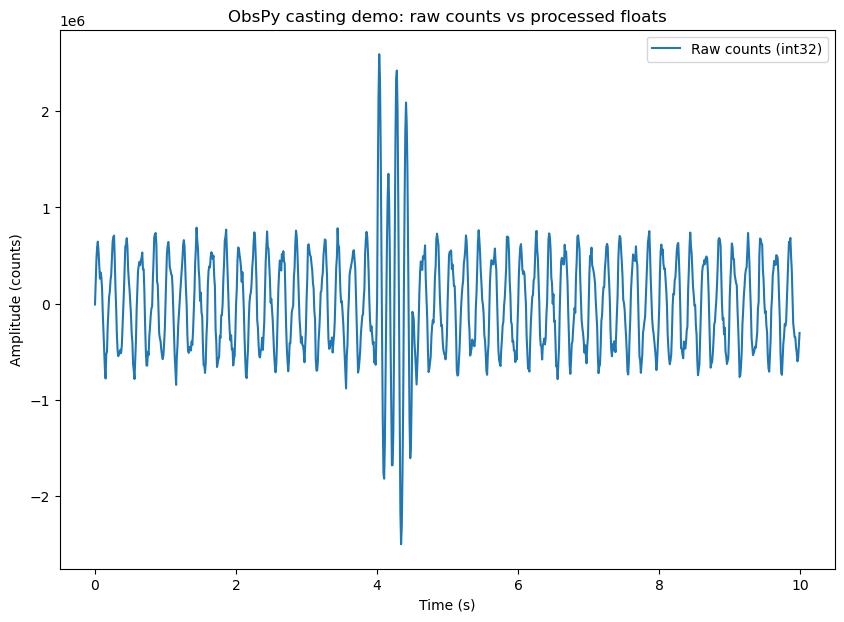

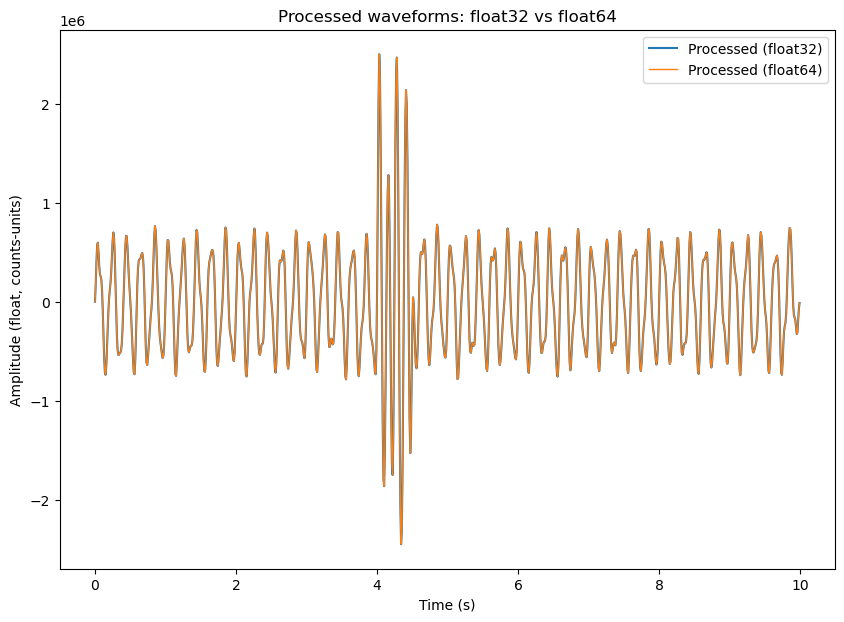

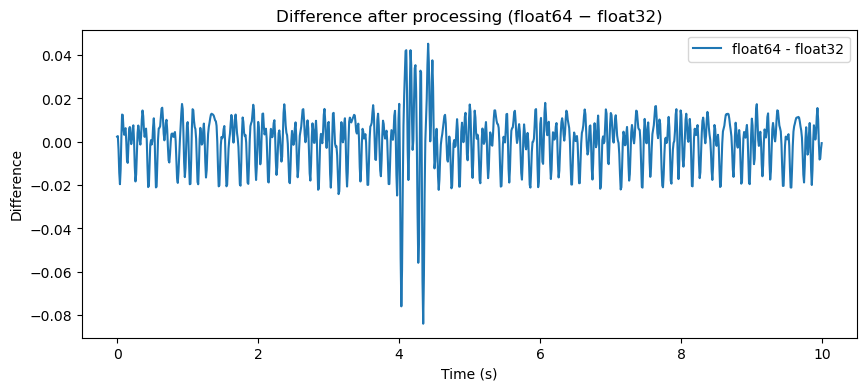

In [20]:
# ObsPy-flavoured casting demo: integer "counts" -> float processing -> cast back
# (Synthetic example; no network/data download required)

import numpy as np
import matplotlib.pyplot as plt
from obspy import Trace, Stream, UTCDateTime

# --- 1) Make a synthetic "counts" waveform (int32), like a digitizer output ---
fs = 100.0  # Hz
n = int(10 * fs)  # 10 seconds
t = np.arange(n) / fs

# Small signal + noise + a burst; then scale to "counts"
sig = (
    0.6 * np.sin(2 * np.pi * 5 * t) +
    0.15 * np.sin(2 * np.pi * 12 * t) +
    0.05 * np.random.randn(n)
)

# Add a short higher-amplitude transient (like an event)
sig[(t > 4.0) & (t < 4.5)] += 2.0 * np.sin(2 * np.pi * 8 * t[(t > 4.0) & (t < 4.5)])

counts_scale = 1_000_000  # counts per "unit"
data_i32 = np.round(sig * counts_scale).astype(np.int32)

tr_counts = Trace(
    data=data_i32,
    header={
        "network": "XX",
        "station": "DEMO",
        "channel": "BHZ",
        "starttime": UTCDateTime(2026, 1, 4),
        "sampling_rate": fs,
    }
)

print("=== Raw Trace ===")
print("Trace dtype:", tr_counts.data.dtype)
print("Min/Max counts:", int(tr_counts.data.min()), int(tr_counts.data.max()))

# --- 2) Cast to float for processing ---
# In ObsPy workflows it's common to convert counts to float before filtering / FFT / metrics
tr_f32 = tr_counts.copy()
tr_f32.data = tr_f32.data.astype(np.float32)

tr_f64 = tr_counts.copy()
tr_f64.data = tr_f64.data.astype(np.float64)

print("\n=== After casting to floats ===")
print("float32 dtype:", tr_f32.data.dtype, "min/max:", float(tr_f32.data.min()), float(tr_f32.data.max()))
print("float64 dtype:", tr_f64.data.dtype, "min/max:", float(tr_f64.data.min()), float(tr_f64.data.max()))

# --- 3) Do a simple processing step (demean + bandpass) ---
# (This is representative of typical seismic preprocessing)
tr_f32_proc = tr_f32.copy()
tr_f64_proc = tr_f64.copy()

tr_f32_proc.detrend("demean")
tr_f64_proc.detrend("demean")

# Use the same bandpass for both
tr_f32_proc.filter("bandpass", freqmin=1.0, freqmax=20.0, corners=4, zerophase=True)
tr_f64_proc.filter("bandpass", freqmin=1.0, freqmax=20.0, corners=4, zerophase=True)

# --- 4) Compare float32 vs float64 results numerically ---
diff = tr_f64_proc.data - tr_f32_proc.data.astype(np.float64)

print("\n=== float64 vs float32 processed difference ===")
print("Max abs difference:", float(np.max(np.abs(diff))))
print("RMS difference    :", float(np.sqrt(np.mean(diff**2))))

# --- 5) Cast back to int32 (simulating writing counts again) ---
# This is not usually recommended for analysis, but it's instructive:
# you reintroduce quantisation and may clip if scaling isn't handled carefully.

# Option A: cast directly (will truncate toward zero)
back_i32_direct = tr_f64_proc.data.astype(np.int32)

# Option B: scale back to counts first, then clip to int32 range
scaled = np.round(tr_f64_proc.data).astype(np.int64)  # still "counts-like" but post-filter
i32_min, i32_max = np.iinfo(np.int32).min, np.iinfo(np.int32).max
scaled_clipped = np.clip(scaled, i32_min, i32_max).astype(np.int32)

print("\n=== Casting processed data back to int32 ===")
print("Direct cast:    min/max", int(back_i32_direct.min()), int(back_i32_direct.max()))
print("Clipped cast:   min/max", int(scaled_clipped.min()), int(scaled_clipped.max()))
print("Note: casting loses fractional information (quantisation).")

# --- 6) Plot: raw counts, processed float32/float64, and their difference ---
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(t, tr_counts.data, label="Raw counts (int32)")
ax.set_title("ObsPy casting demo: raw counts vs processed floats")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (counts)")
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(t, tr_f32_proc.data, label="Processed (float32)")
ax.plot(t, tr_f64_proc.data, label="Processed (float64)", linewidth=1)
ax.set_title("Processed waveforms: float32 vs float64")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (float, counts-units)")
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, diff, label="float64 - float32")
ax.set_title("Difference after processing (float64 − float32)")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Difference")
ax.legend()
plt.show()


## Slide 6 — Digitizers & Dynamic Range

Seismic instruments:
- Commonly **24-bit** digitizers
- Fixed dynamic range
- Saturation → clipping

Key idea:
> Once clipped, information is gone forever

Clipping ≠ overflow  
Clipping happens at the *instrument*, not the CPU.


In [ ]:
# TODO: Add waveform example showing clipping/saturation
# - load a trace
# - simulate clipping
# - plot original vs clipped


## Slide 7 — Quantisation Noise

Digitizers round continuous motion to discrete levels.

Effects:
- Small signals disappear
- Noise floor is imposed by the ADC
- Tremor and microseisms are most affected

This is **not** a processing error — it’s physics + hardware.


In [ ]:
# TODO: Simulate quantisation by rounding to a fixed step size
# - compare quantised vs original
# - estimate quantisation noise level


## Slide 8 — Bytes, Bits, and Reality

**Why data size matters**

Data rate depends on:
- Sample rate
- Number of channels
- Bytes per sample
- Duration

Example:
- 3 components
- 100 Hz
- 24-bit (≈3 bytes)

Multiply that by:
- Stations
- Years
- Networks

This is why:
- Compression exists
- I/O is often the bottleneck
- HPC ≠ magic


In [ ]:
# TODO: Add storage calculator examples
# - compute GB/day, TB/year for various network configurations


## Slide 9 — Floating Point: The Big One

Floating point numbers are stored as:
- Sign
- Mantissa (precision)
- Exponent (scale)

This allows:
- Huge dynamic range
- Finite precision

Key consequence:
> Not all decimal numbers can be represented exactly


## Slide 10 — The Famous Example

```python
0.1 + 0.2 == 0.3
```

❌ False

This is not a bug.  
This is how floating point works.

The same issue affects:
- Spectral amplitudes
- Energy calculations
- Long-duration sums


In [ ]:
# Demo: floating point surprise
0.1 + 0.2 == 0.3


## Slide 11 — Machine Precision

Every floating-point type has a smallest resolvable difference:
- `float32` → ~7 decimal digits
- `float64` → ~16 decimal digits

If changes are smaller than this:
- They vanish
- Or turn into numerical noise


In [ ]:
# TODO: Show machine epsilon and dtype precision
# import numpy as np
# np.finfo(np.float32).eps, np.finfo(np.float64).eps


## Slide 12 — Accumulation of Error

Errors grow when you:
- Sum long time series
- Integrate signals
- Stack spectra
- Compute RSAM for weeks/months

This is why:
- Summation order matters
- Data type choice matters
- Scaling matters


In [ ]:
# TODO: Demonstrate accumulation / summation order
# - sum a large array in float32 vs float64
# - sum in different orders


## Slide 13 — Overflow vs Underflow

- **Overflow**
  - Number too large → `inf`
- **Underflow**
  - Number too small → rounded to zero

Underflow is common in:
- Spectral ratios
- Probability calculations
- ML loss functions

Often silent.  
Often dangerous.


In [ ]:
# TODO: Show simple overflow/underflow examples with numpy
# e.g., np.exp(large), np.exp(-large), ratios of tiny numbers


## Slide 14 — Subtraction Is Dangerous

Subtracting nearly equal numbers:
- Loses precision
- Amplifies noise

Common in:
- Spectral differencing
- Background removal
- Residual calculations

Rule of thumb:
> Subtract late, scale early


In [ ]:
# TODO: Demonstrate catastrophic cancellation
# Example: (a + b) - a when b is tiny relative to a


## Slide 15 — Why This Hits Seismology Hard

Seismic data combines:
- Huge dynamic range
- Long time series
- Small signals
- Repeated operations

That’s a **perfect storm** for numerical issues.


## Slide 16 — Boolean Logic (No Gates!)

Computational logic in seismology looks like this:

```python
trigger = (sta_lta > 3.0) & (snr > 5.0) & (~is_clipped)
```

Not like AND / OR gates on a diagram.


In [ ]:
# TODO: Create example masks and show how they combine
# e.g., using numpy arrays and plotting where conditions are True


## Slide 17 — Masks & Decisions

Boolean logic is used everywhere:
- Event detection
- Data quality control
- Phase picking
- Classification
- ML decision boundaries

If you understand logical masks, you understand:
- STA/LTA logic
- Thresholding
- Rule-based classifiers


## Slide 18 — From Logic to Machine Learning

Rule-based logic:
```text
if A and B and not C → event
```

Machine learning:
- Learns boundaries automatically
- Still constrained by:
  - Numerical precision
  - Floating-point limits
  - Data representation

ML does *not* escape numerical reality.


## Slide 19 — What the Lab Will Do

In this week’s lab, you will:
- Break seismic data numerically
- Observe rounding & drift
- Compare float32 vs float64
- Explore clipping & quantisation
- Build logical detection masks

You’ll see these effects — not just hear about them.


## Slide 20 — Take-Home Messages

1. Computers approximate numbers
2. Precision is finite
3. Small errors accumulate
4. Data types matter
5. Logic matters most when applied

Or simply:
> **Trust plots, question numbers**


## Slide 21 — Looking Ahead

These ideas will reappear in:
- FFTs & spectra
- RSAM / SSAM
- Inversion & optimisation
- HPC workflows
- Machine learning

This is not a one-off topic — it’s a foundation.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, IntSlider, FloatSlider, Dropdown, VBox, HTML, Checkbox
from IPython.display import display

# -------------------------
# Globals / time axis
# -------------------------
FS_ANALOG = 2000.0   # Hz (higher helps interpolation feel "continuous")
T = 6.0              # seconds (long enough to see low fs behaviour)
t_analog = np.arange(0, T, 1/FS_ANALOG)

# -------------------------
# Signal generators
# -------------------------
def make_signal(signal_type, analog_amp, seed=0):
    """
    Return an "analog" waveform x(t) (float64) defined on t_analog.
    We normalize each base signal to max abs ~1, then scale by analog_amp.
    """
    t = t_analog
    rng = np.random.default_rng(seed)

    if signal_type == "Sum of sines":
        x = (
            0.85*np.sin(2*np.pi*1.0*t) +
            0.20*np.sin(2*np.pi*7.0*t + 0.4) +
            0.08*np.sin(2*np.pi*15.0*t + 1.2)
        )

    elif signal_type == "Sawtooth":
        # sawtooth at 2 Hz (range -1..1)
        f = 2.0
        frac = (t * f) % 1.0
        x = 2.0*frac - 1.0
        # add a bit of band-limited-ish wobble so spectrum isn't purely harmonic
        x += 0.08*np.sin(2*np.pi*20.0*t)

    elif signal_type == "Earthquake-like (burst + noise)":
        # A simple “event” model: noise + a damped sinusoid burst (like a ringy arrival/coda)
        noise = 0.15 * rng.standard_normal(len(t))

        t0 = 2.0          # event start (s)
        f0 = 6.0          # Hz dominant
        decay = 1.2       # decay constant
        envelope = np.exp(-(t - t0) * decay) * (t >= t0)
        burst = envelope * np.sin(2*np.pi*f0*(t - t0))

        # Add a slightly higher-frequency component to show aliasing when fs is low
        burst += 0.35 * envelope * np.sin(2*np.pi*18.0*(t - t0) + 0.3)

        x = noise + burst

    else:
        raise ValueError("Unknown signal type.")

    # Normalize then scale
    x = x / (np.max(np.abs(x)) + 1e-12)
    return analog_amp * x

# -------------------------
# ADC helpers
# -------------------------
def quant_levels(bits, vref):
    L = 2**bits
    return np.linspace(-vref, vref, L)

def quantize_uniform(x, bits, vref):
    """
    Uniform quantizer for x in [-vref, +vref].
    Returns quantized x, step size q, and clipped mask.
    """
    clipped = (x < -vref) | (x > vref)
    x_clip = np.clip(x, -vref, vref)

    L = 2**bits
    q = (2*vref) / (L - 1)
    xq = np.round((x_clip + vref) / q) * q - vref
    return xq, q, clipped, x_clip

def sample_via_interpolation(fs_sample, x_analog):
    """
    Sample analog waveform at arbitrary fs_sample using linear interpolation.
    """
    ts = np.arange(0, T, 1/fs_sample)
    xs = np.interp(ts, t_analog, x_analog)
    return ts, xs

def amp_spectrum(x, fs):
    """
    One-sided amplitude spectrum (magnitude) with Hann window.
    """
    x = np.asarray(x)
    if len(x) < 8:
        return np.array([0.0]), np.array([0.0])
    w = np.hanning(len(x))
    X = np.fft.rfft(x * w)
    f = np.fft.rfftfreq(len(x), d=1/fs)
    mag = np.abs(X)
    return f, mag

# -------------------------
# Interactive view
# -------------------------
def adc_view(
    signal="Sum of sines",
    bits=8,
    fs=50,
    analog_amp=0.8,
    adc_fullscale=1.0,
    show_all_levels=False,
    seed=0
):
    # Build analog signal
    x_analog = make_signal(signal, analog_amp=analog_amp, seed=seed)

    # Sample at arbitrary fs (interpolation)
    ts, xs = sample_via_interpolation(fs_sample=float(fs), x_analog=x_analog)

    # Quantize sampled points (with clipping)
    xq, q, clipped_mask, xs_clipped = quantize_uniform(xs, bits=bits, vref=adc_fullscale)

    # Quantization levels for horizontal lines
    levels = quant_levels(bits, vref=adc_fullscale)
    L = len(levels)

    # Decide how many horizontal lines to draw
    if show_all_levels:
        # This can be VERY heavy for bits=12; use with caution.
        levels_to_draw = levels
        level_note = f"(drawing all {L} levels)"
    else:
        max_lines = 128
        if L <= max_lines:
            levels_to_draw = levels
            level_note = f"(drawing all {L} levels)"
        else:
            k = int(np.ceil(L / max_lines))
            levels_to_draw = levels[::k]
            level_note = f"(levels={L}; drawing every {k}-th → {len(levels_to_draw)} lines)"

    # Clipping stats
    nclip = int(np.sum(clipped_mask))
    clip_note = f"Clipping: {nclip}/{len(xs)} sampled points clipped" if nclip > 0 else "Clipping: none"

    # -------------------------
    # Plot 1: Time series with quantization levels + sampled/quantized dots
    # -------------------------
    plt.figure(figsize=(11, 5))

    # Analog reference
    plt.plot(t_analog, x_analog, linewidth=1, label=f"Analog reference (fs={FS_ANALOG:.0f} Hz)")

    # ADC full-scale lines
    plt.axhline(+adc_fullscale, linewidth=1.2, alpha=0.6)
    plt.axhline(-adc_fullscale, linewidth=1.2, alpha=0.6)

    # Quantization level lines
    for y in levels_to_draw:
        plt.axhline(y, linewidth=0.6, alpha=0.25)

    # Sampled (pre-clip) points (faint)
    plt.plot(ts, xs, marker='o', linestyle='None', markersize=5, alpha=0.25, label="Sampled (pre-clip)")

    # Mark samples outside ADC range
    if nclip > 0:
        plt.plot(ts[clipped_mask], xs[clipped_mask], marker='x', linestyle='None',
                 markersize=7, alpha=0.9, label="Samples outside ADC range")

    # Quantized points (strong)
    plt.plot(ts, xq, marker='o', linestyle='None', markersize=7, label="Sampled + quantized")

    # Step line for sample-and-hold feel
    plt.step(ts, xq, where='mid', linewidth=1, alpha=0.8)

    plt.title(
        f"ADC simulator — signal='{signal}', fs={fs} Hz, bits={bits} (Δ={q:.4g}), "
        f"analog_amp={analog_amp:.2f}, fullscale=±{adc_fullscale:.2f}  {level_note}"
    )
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (arb.)")
    ypad = max(0.15, 0.15 * adc_fullscale)
    plt.ylim(-adc_fullscale - ypad, adc_fullscale + ypad)
    plt.grid(True, alpha=0.15)
    plt.legend(loc="upper right")
    plt.show()

    # -------------------------
    # Plot 2: Amplitude spectrum (analog vs sampled+quantized)
    # -------------------------
    fA, mA = amp_spectrum(x_analog, FS_ANALOG)
    fQ, mQ = amp_spectrum(xq, float(fs))

    # To make spectra comparable visually, we can normalize each by its max (optional but helpful)
    mA_n = mA / (mA.max() + 1e-12)
    mQ_n = mQ / (mQ.max() + 1e-12)

    plt.figure(figsize=(11, 4))
    plt.plot(fA, mA_n, linewidth=1, label="Analog spectrum (normalized)")
    plt.plot(fQ, mQ_n, linewidth=1, label="Sampled+quantized spectrum (normalized)")
    plt.title("Amplitude spectrum comparison (watch aliasing + quantization noise)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Normalized magnitude")
    plt.xlim(0, min(200.0, FS_ANALOG/2))  # keep it readable; adjust as desired
    plt.grid(True, alpha=0.15)
    plt.legend(loc="upper right")
    plt.show()

    # Console notes
    print(f"Sampling: interpolated analog (fs={FS_ANALOG:.0f} Hz) to fs={fs} Hz → {len(ts)} samples over {T:.1f} s.")
    print(f"Quantization: {bits}-bit uniform ADC across ±{adc_fullscale} → {2**bits} levels, step Δ={q:.6g}.")
    print(clip_note)
    if bits >= 10 and not show_all_levels:
        print("Note: high bit depths have many levels; the plot shows a downsampled set of level lines for clarity.")

# -------------------------
# Widgets UI
# -------------------------
ui = VBox([
    HTML(
        "<b>Interactive ADC demo (interpolated sampling + selectable signals + spectrum)</b><br>"
        "Choose <b>signal type</b>, <b>bits</b>, <b>sampling rate</b>, <b>analog amplitude</b>, and <b>ADC full-scale</b>.<br>"
        "Time plot: analog waveform + quantization levels + sampled points + quantized points (sample-and-hold).<br>"
        "Spectrum plot: analog vs sampled+quantized (normalized)."
    )
])
display(ui)

interact(
    adc_view,
    signal=Dropdown(
        options=["Sum of sines", "Earthquake-like (burst + noise)", "Sawtooth"],
        value="Sum of sines",
        description="signal"
    ),
    bits=IntSlider(value=8, min=1, max=12, step=1, description="bits"),
    fs=IntSlider(value=50, min=1, max=500, step=1, description="fs (Hz)"),
    analog_amp=FloatSlider(value=0.8, min=0.1, max=2.0, step=0.05, description="analog_amp"),
    adc_fullscale=FloatSlider(value=1.0, min=0.2, max=2.0, step=0.05, description="fullscale"),
    show_all_levels=Checkbox(value=False, description="draw all levels"),
    seed=IntSlider(value=0, min=0, max=20, step=1, description="noise seed")
);


interactive(children=(Dropdown(description='signal', options=('Sum of sines', 'Earthquake-like (burst + noise)…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown, Checkbox, VBox, HTML
from IPython.display import display

# -------------------------
# Helpers: signals, detrend, taper, DFT
# -------------------------
def make_signal(sig_type, N, fs, seed=0, f0=5.0, noise=0.05,
                # realistic broadband controls
                dc_offset=0.0, micro_amp=0.0, drift_amp=0.0,
                # generic trend control
                trend_slope=0.0,
                box_frac=0.2, delta_pos=0.25):
    rng = np.random.default_rng(seed)
    t = np.arange(N) / fs

    if sig_type == "Delta pulse":
        x = np.zeros(N)
        idx = int(np.clip(delta_pos, 0, 0.999) * N)
        x[idx] = 1.0

    elif sig_type == "Boxcar / step":
        x = np.zeros(N)
        w = max(1, int(box_frac * N))
        start = int(0.1 * N)
        x[start:start+w] = 1.0

    elif sig_type == "Sine":
        x = np.sin(2*np.pi*f0*t)

    elif sig_type == "Linear trend":
        x = (t - t.mean())

    elif sig_type == "Simulated earthquake (simple burst + noise)":
        x = noise * rng.standard_normal(N)
        t0 = 0.25 * (N/fs)
        env = np.exp(-(t - t0) * 6.0) * (t >= t0)
        x += 1.0 * env * np.sin(2*np.pi*f0*(t - t0))
        x += 0.4 * env * np.sin(2*np.pi*(3*f0)*(t - t0) + 0.4)

    elif sig_type == "Simulated earthquake (broadband + offset + microseism)":
        # White background noise
        x = noise * rng.standard_normal(N)

        # Microseism-like narrowband low frequency components (0.05–0.3 Hz-ish)
        f_micro1 = 0.12
        f_micro2 = 0.22
        x += micro_amp * (0.7*np.sin(2*np.pi*f_micro1*t + 0.5) +
                          0.5*np.sin(2*np.pi*f_micro2*t + 1.3))

        # Drift / wander (random walk; often looks linear over short windows)
        if drift_amp != 0.0:
            rw = np.cumsum(rng.standard_normal(N))
            rw = rw / (np.max(np.abs(rw)) + 1e-12)
            x += drift_amp * rw

        # DC offset (mean shift)
        x += dc_offset

        # Earthquake burst: decaying envelope + mixed frequencies + stochastic broadening
        t0 = 0.25 * (N/fs)
        env = np.exp(-(t - t0) * 2.5) * (t >= t0)

        burst = env * (
            1.4*np.sin(2*np.pi*f0*(t - t0)) +
            0.9*np.sin(2*np.pi*(2.3*f0)*(t - t0) + 0.4) +
            0.6*np.sin(2*np.pi*(3.8*f0)*(t - t0) + 1.0)
        )
        burst += env * 0.4 * rng.standard_normal(N)
        x += burst

    else:
        raise ValueError("Unknown signal type.")

    # Optional pure linear trend (handy for sawtooth-on-repeat teaching)
    if trend_slope != 0.0:
        x = x + trend_slope * (t - t[0])

    return t, x

def inject_artifacts(x, fs, spike_amp=0.0, spike_count=0, spike_width=1,
                     dropout_frac=0.0, dropout_mode="NaN", seed=0):
    """
    Inject telemetry-style artifacts into a copy of x.

    spike_amp: amplitude of spikes (absolute, in same units as x)
    spike_count: number of spikes
    spike_width: samples per spike (1–10 typical)
    dropout_frac: fraction of record to drop (0..0.5)
    dropout_mode: "NaN" or "Zero"
    """
    rng = np.random.default_rng(seed)
    y = x.copy()
    N = len(y)

    # --- spikes ---
    if spike_count > 0 and spike_amp != 0.0:
        for _ in range(spike_count):
            i0 = rng.integers(0, max(1, N - spike_width))
            # random sign spikes are common in digitizer glitches
            sign = rng.choice([-1.0, 1.0])
            y[i0:i0+spike_width] += sign * spike_amp

    # --- dropout ---
    if dropout_frac > 0.0:
        w = int(np.clip(dropout_frac, 0.0, 0.9) * N)
        if w > 0:
            i0 = rng.integers(0, N - w)
            if dropout_mode == "NaN":
                y[i0:i0+w] = np.nan
            elif dropout_mode == "Zero":
                y[i0:i0+w] = 0.0
            else:
                raise ValueError("dropout_mode must be 'NaN' or 'Zero'")

    return y


def detrend_linear(x):
    n = np.arange(len(x))
    p = np.polyfit(n, x, deg=1)
    return x - np.polyval(p, n)

def taper_window(N, taper="Hann"):
    if taper == "None":
        return np.ones(N)
    if taper == "Hann":
        return np.hanning(N)
    if taper == "Tukey(0.2)":
        alpha = 0.2
        w = np.ones(N)
        edge = int(alpha*(N-1)/2)
        if edge > 0:
            n = np.arange(edge)
            w[:edge] = 0.5*(1 - np.cos(np.pi*n/edge))
            w[-edge:] = w[:edge][::-1]
        return w
    raise ValueError("Unknown taper type.")

def dft_mag(x, fs):
    X = np.fft.rfft(x)
    f = np.fft.rfftfreq(len(x), d=1/fs)
    mag = np.abs(X)
    return f, mag

def tile_signal(x, tiles=5):
    return np.tile(x, tiles)

# -------------------------
# Interactive DFT demo
# -------------------------
def dft_demo(
    signal="Delta pulse",
    N=512,
    fs=100.0,
    f0=5.0,
    noise=0.05,

    # realistic broadband controls
    dc_offset=1.0,
    micro_amp=0.6,
    drift_amp=0.15,

    # generic trend control
    trend_slope=0.0,

    mean_remove=False,
    do_detrend=False,
    taper="None",
    tiles=5,

    log_spectrum=True,
    normalize_spectra=False,

    seed=0
):
    t, x = make_signal(
        signal, N=N, fs=fs, seed=seed, f0=f0, noise=noise,
        dc_offset=dc_offset, micro_amp=micro_amp, drift_amp=drift_amp,
        trend_slope=trend_slope
    )

    # --- inject telemetry artifacts ---
    x_art = inject_artifacts(
        x, fs,
        spike_amp=spike_amp,
        spike_count=spike_count,
        spike_width=spike_width,
        dropout_frac=dropout_frac,
        dropout_mode=dropout_mode,
        seed=seed
    )

    # Replace x with artifacted version for downstream processing
    x = x_art


    x_proc = x.copy()

    if mean_remove:
        x_proc = x_proc - np.mean(x_proc)

    if do_detrend:
        x_proc = detrend_linear(x_proc)

    w = taper_window(N, taper=taper)
    x_win = x_proc * w

    # Periodic extension (show repetition)
    x_rep_raw = tile_signal(x, tiles=tiles)
    x_rep_win = tile_signal(x_win, tiles=tiles)
    t_rep = np.arange(len(x_rep_raw)) / fs

    # DFT magnitude
    f_raw, mag_raw = dft_mag(x, fs)
    f_win, mag_win = dft_mag(x_win, fs)

    # Key frequency quantities
    f_nyq = fs / 2.0
    df = fs / N  # bin spacing

    # Optional spectrum normalization (better for seeing peak locations)
    if normalize_spectra:
        mag_raw_plot = mag_raw / (np.max(mag_raw) + 1e-12)
        mag_win_plot = mag_win / (np.max(mag_win) + 1e-12)
        norm_note = " (normalized)"
    else:
        mag_raw_plot = mag_raw
        mag_win_plot = mag_win
        norm_note = ""

    # -------------------------
    # Plot 1: Time domain (one record)
    # -------------------------
    plt.figure(figsize=(11, 4))
    plt.plot(t, x, linewidth=1, label="Original record x[n]")
    plt.plot(t, x_win, linewidth=1, label="Processed (mean/detrend/taper)")
    plt.title(f"Finite record (N={N}, fs={fs:.1f} Hz) — what you feed into the DFT")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.15)
    plt.legend()
    plt.show()

    # -------------------------
    # Plot 2: Periodic extension
    # -------------------------
    plt.figure(figsize=(11, 4))
    plt.plot(t_rep, x_rep_raw, linewidth=1, label="Periodic extension of original x[n]")
    plt.plot(t_rep, x_rep_win, linewidth=1, label="Periodic extension of processed signal")
    for k in range(1, tiles):
        plt.axvline(k*(N/fs), linewidth=1, alpha=0.3)
    plt.title("Periodic extension: the DFT assumes your record repeats forever")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.15)
    plt.legend()
    plt.show()

    # -------------------------
    # Plot 3: Spectrum (with Nyquist + Δf)
    # -------------------------
    plt.figure(figsize=(11, 4))

    if log_spectrum:
        eps = 1e-12
        plt.plot(f_raw, 20*np.log10(mag_raw_plot + eps), linewidth=1,
                 label="Original |X[k]| (dB)" + norm_note)
        plt.plot(f_win, 20*np.log10(mag_win_plot + eps), linewidth=1,
                 label="Processed |X[k]| (dB)" + norm_note)
        plt.ylabel("Magnitude (dB)")
    else:
        plt.plot(f_raw, mag_raw_plot, linewidth=1,
                 label="Original |X[k]|" + norm_note)
        plt.plot(f_win, mag_win_plot, linewidth=1,
                 label="Processed |X[k]|" + norm_note)
        plt.ylabel("Magnitude")

    # Nyquist marker (spectrum ends at Nyquist, but this label helps)
    plt.axvline(f_nyq, linewidth=1.2, alpha=0.35)
    # Δf marker: show the first non-zero bin position
    plt.axvline(df, linewidth=1.2, alpha=0.25)

    plt.title("DFT magnitude spectrum: leakage vs true spectral peaks")
    plt.xlabel("Frequency (Hz)")
    plt.xlim(0, f_nyq)

    # Annotate df and Nyquist
    text = f"Nyquist = {f_nyq:.2f} Hz\nΔf = fs/N = {df:.4f} Hz"
    plt.text(0.98, 0.95, text, transform=plt.gca().transAxes,
             ha="right", va="top",
             bbox=dict(boxstyle="round", alpha=0.15))

    plt.grid(True, alpha=0.15)
    plt.legend()
    plt.show()

    # -------------------------
    # Teaching notes + summary
    # -------------------------
    end_jump_raw = x[0] - x[-1]
    end_jump_proc = x_win[0] - x_win[-1]
    print("Key idea: the DFT assumes periodic repetition of the finite record.")
    print(f"Record length = {N/fs:.3f} s   →   Δf = {df:.6g} Hz")
    print(f"Nyquist = fs/2 = {f_nyq:.6g} Hz")
    print(f"Endpoint mismatch (x[0] - x[-1]) original:  {end_jump_raw:+.4g}")
    print(f"Endpoint mismatch (x[0] - x[-1]) processed: {end_jump_proc:+.4g}")
    print("- Big endpoint mismatch ⇒ implicit step/sawtooth at boundary ⇒ broadband spectral leakage.")
    print("- Mean remove reduces DC; detrend removes ramp ⇒ reduces sawtooth; taper softens boundary step.")

    # --- Quantitative summary metrics ---
    rms_time = np.sqrt(np.mean((x - x_win)**2))
    rms_orig = np.sqrt(np.mean(x**2)) + 1e-12
    rel_rms_time = rms_time / rms_orig

    # Compare *shape* of spectra via normalization by L2 norm (independent of absolute scaling)
    mag_raw_n = mag_raw / (np.linalg.norm(mag_raw) + 1e-12)
    mag_win_n = mag_win / (np.linalg.norm(mag_win) + 1e-12)
    spec_l2 = np.linalg.norm(mag_raw_n - mag_win_n)

    spec_energy_raw = np.sum(mag_raw**2)
    spec_energy_win = np.sum(mag_win**2)
    rel_energy_diff = (spec_energy_win - spec_energy_raw) / (spec_energy_raw + 1e-12)

    print("\n=== Summary: Original vs Processed ===")
    print("Time domain:")
    print(f"  RMS(original)                 = {rms_orig:.4g}")
    print(f"  RMS difference                = {rms_time:.4g}")
    print(f"  Relative RMS difference       = {rel_rms_time:.4g}")
    print("Frequency domain:")
    print(f"  Spectral L2 difference (norm) = {spec_l2:.4g}")
    print(f"  Relative spectral energy diff = {rel_energy_diff:+.4g}")

    if signal == "Simulated earthquake (broadband + offset + microseism)":
        print("\nBroadband quake controls:")
        print(f"  dc_offset={dc_offset}, micro_amp={micro_amp}, drift_amp={drift_amp}, noise={noise}")
        print("  Try: (1) mean_remove only, (2) detrend only, (3) taper only, then combine them.")

# -------------------------
# UI
# -------------------------
ui = VBox([
    HTML(
        "<b>Interactive DFT demo: periodic extension + detrend/taper + Nyquist/Δf + optional spectrum normalization</b><br>"
        "Pick a signal, then toggle mean removal, detrending, tapering, and spectrum normalization. "
        "Watch how the repeated time series and spectrum change."
    )
])
display(ui)

interact(
    dft_demo,
    signal=Dropdown(
        options=[
            "Delta pulse",
            "Boxcar / step",
            "Simulated earthquake (simple burst + noise)",
            "Simulated earthquake (broadband + offset + microseism)",
            "Sine",
            "Linear trend"
        ],
        value="Simulated earthquake (broadband + offset + microseism)",
        description="signal"
    ),
    N=Dropdown(options=[256, 512, 1024, 2048], value=512, description="N"),
    fs=FloatSlider(value=100.0, min=20.0, max=500.0, step=10.0, description="fs (Hz)"),
    f0=FloatSlider(value=5.0, min=0.5, max=50.0, step=0.5, description="f0 (Hz)"),
    noise=FloatSlider(value=0.05, min=0.0, max=0.3, step=0.01, description="noise"),

    dc_offset=FloatSlider(value=1.0, min=0.0, max=2.5, step=0.1, description="DC offset"),
    micro_amp=FloatSlider(value=0.6, min=0.0, max=1.5, step=0.05, description="micro amp"),
    drift_amp=FloatSlider(value=0.15, min=0.0, max=0.8, step=0.05, description="drift amp"),

    trend_slope=FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description="trend"),

    mean_remove=Checkbox(value=False, description="mean remove"),
    do_detrend=Checkbox(value=False, description="detrend"),
    taper=Dropdown(options=["None", "Hann", "Tukey(0.2)"], value="None", description="taper"),
    tiles=IntSlider(value=5, min=3, max=9, step=1, description="tiles"),

    log_spectrum=Checkbox(value=True, description="log spectrum"),
    normalize_spectra=Checkbox(value=False, description="normalize spectra"),

    seed=IntSlider(value=0, min=0, max=20, step=1, description="seed")
);


interactive(children=(Dropdown(description='signal', index=3, options=('Delta pulse', 'Boxcar / step', 'Simula…

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown, Checkbox, VBox, HTML
from IPython.display import display

# -------------------------
# Helpers: signals, artifacts, preprocessing, DFT
# -------------------------
def make_signal(sig_type, N, fs, seed=0, f0=5.0, noise=0.05,
                # realistic broadband controls
                dc_offset=0.0, micro_amp=0.0, drift_amp=0.0,
                # generic trend control
                trend_slope=0.0,
                box_frac=0.2, delta_pos=0.25):
    rng = np.random.default_rng(seed)
    t = np.arange(N) / fs

    if sig_type == "Delta pulse":
        x = np.zeros(N)
        idx = int(np.clip(delta_pos, 0, 0.999) * N)
        x[idx] = 1.0

    elif sig_type == "Boxcar / step":
        x = np.zeros(N)
        w = max(1, int(box_frac * N))
        start = int(0.1 * N)
        x[start:start+w] = 1.0

    elif sig_type == "Sine":
        x = np.sin(2*np.pi*f0*t)

    elif sig_type == "Linear trend":
        x = (t - t.mean())

    elif sig_type == "Simulated earthquake (simple burst + noise)":
        x = noise * rng.standard_normal(N)
        t0 = 0.25 * (N/fs)
        env = np.exp(-(t - t0) * 6.0) * (t >= t0)
        x += 1.0 * env * np.sin(2*np.pi*f0*(t - t0))
        x += 0.4 * env * np.sin(2*np.pi*(3*f0)*(t - t0) + 0.4)

    elif sig_type == "Simulated earthquake (broadband + offset + microseism)":
        # White background noise
        x = noise * rng.standard_normal(N)

        # Microseism-like narrowband low frequency components (0.05–0.3 Hz-ish)
        f_micro1 = 0.12
        f_micro2 = 0.22
        x += micro_amp * (0.7*np.sin(2*np.pi*f_micro1*t + 0.5) +
                          0.5*np.sin(2*np.pi*f_micro2*t + 1.3))

        # Drift / wander (random walk; can look linear over short windows)
        if drift_amp != 0.0:
            rw = np.cumsum(rng.standard_normal(N))
            rw = rw / (np.max(np.abs(rw)) + 1e-12)
            x += drift_amp * rw

        # DC offset (mean shift)
        x += dc_offset

        # Earthquake burst: decaying envelope + mixed frequencies + stochastic broadening
        t0 = 0.25 * (N/fs)
        env = np.exp(-(t - t0) * 2.5) * (t >= t0)

        burst = env * (
            1.4*np.sin(2*np.pi*f0*(t - t0)) +
            0.9*np.sin(2*np.pi*(2.3*f0)*(t - t0) + 0.4) +
            0.6*np.sin(2*np.pi*(3.8*f0)*(t - t0) + 1.0)
        )
        burst += env * 0.4 * rng.standard_normal(N)
        x += burst

    else:
        raise ValueError("Unknown signal type.")

    # Optional pure linear trend (handy for sawtooth-on-repeat teaching)
    if trend_slope != 0.0:
        x = x + trend_slope * (t - t[0])

    return t, x

def inject_artifacts(x, spike_mult_rms=0.0, spike_count=0, spike_width=1,
                     dropout_frac=0.0, dropout_mode="NaN", seed=0):
    """
    Inject telemetry artifacts into a copy of x.

    spike_mult_rms: spike amplitude = spike_mult_rms * RMS(x)
                    (e.g., 1e6 approximates "10^6 times larger than the signal")
    spike_count: number of spike events
    spike_width: samples per spike (1–20)
    dropout_frac: fraction of record to drop (0..0.5)
    dropout_mode: "NaN" or "Zero"
    """
    rng = np.random.default_rng(seed)
    y = x.copy()
    N = len(y)

    # Spikes
    if spike_count > 0 and spike_mult_rms > 0.0:
        rms = np.sqrt(np.mean(y**2)) + 1e-12
        spike_amp = spike_mult_rms * rms
        for _ in range(spike_count):
            i0 = rng.integers(0, max(1, N - spike_width))
            sign = rng.choice([-1.0, 1.0])
            y[i0:i0+spike_width] += sign * spike_amp

    # Dropout
    if dropout_frac > 0.0:
        w = int(np.clip(dropout_frac, 0.0, 0.9) * N)
        if w > 0:
            i0 = rng.integers(0, N - w)
            if dropout_mode == "NaN":
                y[i0:i0+w] = np.nan
            elif dropout_mode == "Zero":
                y[i0:i0+w] = 0.0
            else:
                raise ValueError("dropout_mode must be 'NaN' or 'Zero'")

    return y

def fill_nans(x, mode="Linear interp"):
    """
    Replace NaNs so FFT is possible.
    """
    y = x.copy()
    isnan = np.isnan(y)
    if not np.any(isnan):
        return y

    if mode == "Linear interp":
        idx = np.arange(len(y))
        # If all NaN (pathological), just return zeros
        if np.all(isnan):
            return np.zeros_like(y)
        y[isnan] = np.interp(idx[isnan], idx[~isnan], y[~isnan])
        return y

    if mode == "Fill zero":
        y[isnan] = 0.0
        return y

    raise ValueError("NaN handling mode must be 'Linear interp' or 'Fill zero'.")

def detrend_linear(x):
    n = np.arange(len(x))
    p = np.polyfit(n, x, deg=1)
    return x - np.polyval(p, n)

def taper_window(N, taper="Hann"):
    if taper == "None":
        return np.ones(N)
    if taper == "Hann":
        return np.hanning(N)
    if taper == "Tukey(0.2)":
        alpha = 0.2
        w = np.ones(N)
        edge = int(alpha*(N-1)/2)
        if edge > 0:
            n = np.arange(edge)
            w[:edge] = 0.5*(1 - np.cos(np.pi*n/edge))
            w[-edge:] = w[:edge][::-1]
        return w
    raise ValueError("Unknown taper type.")

def dft_mag(x, fs):
    X = np.fft.rfft(x)
    f = np.fft.rfftfreq(len(x), d=1/fs)
    mag = np.abs(X)
    return f, mag

def tile_signal(x, tiles=5):
    return np.tile(x, tiles)

# -------------------------
# Interactive DFT demo
# -------------------------
def dft_demo(
    signal="Simulated earthquake (broadband + offset + microseism)",
    N=512,
    fs=100.0,
    f0=5.0,
    noise=0.05,

    # realistic broadband controls
    dc_offset=1.0,
    micro_amp=0.6,
    drift_amp=0.15,

    # generic trend control
    trend_slope=0.0,

    # artifacts
    spike_mult_rms=0.0,
    spike_count=0,
    spike_width=1,
    dropout_frac=0.0,
    dropout_mode="NaN",
    nan_handling="Linear interp",

    # preprocessing
    mean_remove=False,
    do_detrend=False,
    taper="None",
    tiles=5,

    # spectrum display
    log_spectrum=True,
    normalize_spectra=False,
    compare_clean_vs_artifacted=True,

    seed=0
):
    # ---- Build clean signal ----
    t, x_clean = make_signal(
        signal, N=N, fs=fs, seed=seed, f0=f0, noise=noise,
        dc_offset=dc_offset, micro_amp=micro_amp, drift_amp=drift_amp,
        trend_slope=trend_slope
    )

    # ---- Inject artifacts ----
    x_art = inject_artifacts(
        x_clean,
        spike_mult_rms=spike_mult_rms,
        spike_count=spike_count,
        spike_width=spike_width,
        dropout_frac=dropout_frac,
        dropout_mode=dropout_mode,
        seed=seed + 123
    )

    # ---- For FFT, resolve NaNs in artifacted signal ----
    x_art_filled = fill_nans(x_art, mode=nan_handling)

    # Pick which series is "the" x for downstream processing/plots
    x = x_art_filled

    # ---- Preprocess (mean/detrend/taper) ----
    x_proc = x.copy()
    if mean_remove:
        x_proc = x_proc - np.mean(x_proc)
    if do_detrend:
        x_proc = detrend_linear(x_proc)
    w = taper_window(N, taper=taper)
    x_win = x_proc * w

    # Also preprocess the clean signal for comparison (optional)
    x_clean_proc = x_clean.copy()
    if mean_remove:
        x_clean_proc = x_clean_proc - np.mean(x_clean_proc)
    if do_detrend:
        x_clean_proc = detrend_linear(x_clean_proc)
    x_clean_win = x_clean_proc * w

    # ---- Periodic extension (show repetition) ----
    x_rep_raw = tile_signal(x, tiles=tiles)
    x_rep_win = tile_signal(x_win, tiles=tiles)

    t_rep = np.arange(len(x_rep_raw)) / fs

    # ---- DFT magnitudes ----
    f_raw, mag_raw = dft_mag(x, fs)
    f_win, mag_win = dft_mag(x_win, fs)

    f_clean_raw, mag_clean_raw = dft_mag(x_clean, fs)
    f_clean_win, mag_clean_win = dft_mag(x_clean_win, fs)

    # Key frequency quantities
    f_nyq = fs / 2.0
    df = fs / N

    # Optional spectrum normalization (helps show peak locations)
    if normalize_spectra:
        mag_raw_plot = mag_raw / (np.max(mag_raw) + 1e-12)
        mag_win_plot = mag_win / (np.max(mag_win) + 1e-12)
        mag_clean_raw_plot = mag_clean_raw / (np.max(mag_clean_raw) + 1e-12)
        mag_clean_win_plot = mag_clean_win / (np.max(mag_clean_win) + 1e-12)
        norm_note = " (normalized)"
    else:
        mag_raw_plot, mag_win_plot = mag_raw, mag_win
        mag_clean_raw_plot, mag_clean_win_plot = mag_clean_raw, mag_clean_win
        norm_note = ""

    # -------------------------
    # Plot 1: Time domain (clean vs artifacted)
    # -------------------------
    plt.figure(figsize=(11, 4))
    plt.plot(t, x_clean, linewidth=1, label="Clean record")
    plt.plot(t, x, linewidth=1, label="Artifacted (NaNs handled for FFT)")
    plt.title(f"Finite record (N={N}, fs={fs:.1f} Hz): clean vs artifacted")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.15)
    plt.legend()
    plt.show()

    # -------------------------
    # Plot 2: Processed vs original (artifacted path)
    # -------------------------
    plt.figure(figsize=(11, 4))
    plt.plot(t, x, linewidth=1, label="Original (artifacted)")
    plt.plot(t, x_win, linewidth=1, label="Processed (mean/detrend/taper)")
    plt.title("What you feed into the DFT: original vs processed (artifacted)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.15)
    plt.legend()
    plt.show()

    # -------------------------
    # Plot 3: Periodic extension (artifacted)
    # -------------------------
    plt.figure(figsize=(11, 4))
    plt.plot(t_rep, x_rep_raw, linewidth=1, label="Periodic extension of original (artifacted)")
    plt.plot(t_rep, x_rep_win, linewidth=1, label="Periodic extension of processed (artifacted)")
    for k in range(1, tiles):
        plt.axvline(k*(N/fs), linewidth=1, alpha=0.3)
    plt.title("Periodic extension: the DFT assumes your record repeats forever")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.15)
    plt.legend()
    plt.show()

    # -------------------------
    # Plot 4: Spectrum
    # -------------------------
    plt.figure(figsize=(11, 4))
    eps = 1e-12

    def to_db(m):
        return 20*np.log10(m + eps)

    if log_spectrum:
        y1 = to_db(mag_raw_plot)
        y2 = to_db(mag_win_plot)
        ylabel = "Magnitude (dB)"
        if compare_clean_vs_artifacted:
            yc1 = to_db(mag_clean_raw_plot)
            yc2 = to_db(mag_clean_win_plot)
    else:
        y1, y2 = mag_raw_plot, mag_win_plot
        ylabel = "Magnitude"
        if compare_clean_vs_artifacted:
            yc1, yc2 = mag_clean_raw_plot, mag_clean_win_plot

    # artifacted curves
    plt.plot(f_raw, y1, linewidth=1, label="Artifacted original" + norm_note)
    plt.plot(f_win, y2, linewidth=1, label="Artifacted processed" + norm_note)

    # clean curves (optional overlay)
    if compare_clean_vs_artifacted:
        plt.plot(f_clean_raw, yc1, linewidth=1, alpha=0.7, label="Clean original" + norm_note)
        plt.plot(f_clean_win, yc2, linewidth=1, alpha=0.7, label="Clean processed" + norm_note)

    # Nyquist + df markers
    plt.axvline(f_nyq, linewidth=1.2, alpha=0.35)
    plt.axvline(df, linewidth=1.2, alpha=0.25)

    plt.title("DFT magnitude spectrum: artifacts vs preprocessing vs true peaks")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel(ylabel)
    plt.xlim(0, f_nyq)

    text = f"Nyquist = {f_nyq:.2f} Hz\nΔf = fs/N = {df:.4f} Hz"
    plt.text(0.98, 0.95, text, transform=plt.gca().transAxes,
             ha="right", va="top",
             bbox=dict(boxstyle="round", alpha=0.15))

    plt.grid(True, alpha=0.15)
    plt.legend()
    plt.show()

    # -------------------------
    # Teaching notes + summary
    # -------------------------
    end_jump_raw = x[0] - x[-1]
    end_jump_proc = x_win[0] - x_win[-1]

    # artifact summary
    n_nans = int(np.sum(np.isnan(x_art)))
    print("Key idea: the DFT assumes periodic repetition of the finite record.")
    print(f"Record length = {N/fs:.3f} s   →   Δf = {df:.6g} Hz   |   Nyquist = {f_nyq:.6g} Hz")
    print(f"Endpoint mismatch (x[0] - x[-1]) artifacted original:  {end_jump_raw:+.4g}")
    print(f"Endpoint mismatch (x[0] - x[-1]) artifacted processed: {end_jump_proc:+.4g}")
    print("- Big endpoint mismatch ⇒ implicit step/sawtooth at boundary ⇒ broadband spectral leakage.")
    print("- Mean remove reduces DC; detrend removes ramp ⇒ reduces sawtooth; taper softens boundary step.")
    if spike_count > 0 and spike_mult_rms > 0:
        print(f"\nArtifacts: spikes={spike_count} × width={spike_width} samples, amplitude={spike_mult_rms:.3g}×RMS(clean)")
        print("  Spike intuition: a delta-like glitch injects broadband energy → spectrum can look 'white-ish'.")
    if dropout_frac > 0:
        print(f"Artifacts: dropout_frac={dropout_frac:.3g}, mode={dropout_mode}, NaNs inserted={n_nans}, NaN handling={nan_handling}")
        print("  Dropout intuition: gaps/zero-fills create step edges → broadband leakage.")

    # --- Quantitative summary metrics (artifacted path) ---
    rms_time = np.sqrt(np.mean((x - x_win)**2))
    rms_orig = np.sqrt(np.mean(x**2)) + 1e-12
    rel_rms_time = rms_time / rms_orig

    mag_raw_n = mag_raw / (np.linalg.norm(mag_raw) + 1e-12)
    mag_win_n = mag_win / (np.linalg.norm(mag_win) + 1e-12)
    spec_l2 = np.linalg.norm(mag_raw_n - mag_win_n)

    spec_energy_raw = np.sum(mag_raw**2)
    spec_energy_win = np.sum(mag_win**2)
    rel_energy_diff = (spec_energy_win - spec_energy_raw) / (spec_energy_raw + 1e-12)

    # --- Quantitative: clean vs artifacted spectrum difference (shape) ---
    mag_clean_n = mag_clean_raw / (np.linalg.norm(mag_clean_raw) + 1e-12)
    mag_art_n = mag_raw / (np.linalg.norm(mag_raw) + 1e-12)
    clean_vs_art_spec_l2 = np.linalg.norm(mag_clean_n - mag_art_n)

    print("\n=== Summary metrics (artifacted path) ===")
    print("Time domain:")
    print(f"  RMS(original)                 = {rms_orig:.4g}")
    print(f"  RMS difference                = {rms_time:.4g}")
    print(f"  Relative RMS difference       = {rel_rms_time:.4g}")
    print("Frequency domain:")
    print(f"  Spectral L2 difference (norm) = {spec_l2:.4g}   (original vs processed)")
    print(f"  Relative spectral energy diff = {rel_energy_diff:+.4g} (processed vs original)")
    print(f"  Clean vs artifacted spec L2   = {clean_vs_art_spec_l2:.4g}   (shape change due to artifacts)")

# -------------------------
# UI
# -------------------------
ui = VBox([
    HTML(
        "<b>Interactive DFT demo: periodic extension + preprocessing + Nyquist/Δf + artifacts (spikes/dropouts)</b><br>"
        "New: inject spikes up to <i>10^6× RMS</i> and dropouts (NaN/Zero), then see how spectra get dominated. "
        "Toggle <b>compare clean vs artifacted</b> to see the impact clearly."
    )
])
display(ui)

interact(
    dft_demo,
    signal=Dropdown(
        options=[
            "Delta pulse",
            "Boxcar / step",
            "Simulated earthquake (simple burst + noise)",
            "Simulated earthquake (broadband + offset + microseism)",
            "Sine",
            "Linear trend"
        ],
        value="Simulated earthquake (broadband + offset + microseism)",
        description="signal"
    ),
    N=Dropdown(options=[256, 512, 1024, 2048], value=512, description="N"),
    fs=FloatSlider(value=100.0, min=20.0, max=500.0, step=10.0, description="fs (Hz)"),
    f0=FloatSlider(value=5.0, min=0.5, max=50.0, step=0.5, description="f0 (Hz)"),
    noise=FloatSlider(value=0.05, min=0.0, max=0.3, step=0.01, description="noise"),

    dc_offset=FloatSlider(value=4.0, min=0.0, max=2.5, step=0.1, description="DC offset"),
    micro_amp=FloatSlider(value=0.6, min=0.0, max=1.5, step=0.05, description="micro amp"),
    drift_amp=FloatSlider(value=0.15, min=0.0, max=0.8, step=0.05, description="drift amp"),
    trend_slope=FloatSlider(value=1.4, min=-2.0, max=2.0, step=0.1, description="trend"),

    spike_mult_rms=FloatSlider(value=5.0, min=0.0, max=100, step=10, description="spike ×RMS"),
    spike_count=IntSlider(value=1, min=0, max=10, step=1, description="spikes"),
    spike_width=IntSlider(value=1, min=1, max=20, step=1, description="spike w"),

    dropout_frac=FloatSlider(value=0.0, min=0.0, max=0.3, step=0.01, description="drop frac"),
    dropout_mode=Dropdown(options=["NaN", "Zero"], value="NaN", description="drop mode"),
    nan_handling=Dropdown(options=["Linear interp", "Fill zero"], value="Linear interp", description="NaN fill"),

    mean_remove=Checkbox(value=False, description="mean remove"),
    do_detrend=Checkbox(value=False, description="detrend"),
    taper=Dropdown(options=["None", "Hann", "Tukey(0.2)"], value="None", description="taper"),
    tiles=IntSlider(value=5, min=3, max=9, step=1, description="tiles"),

    log_spectrum=Checkbox(value=False, description="log spectrum"),
    normalize_spectra=Checkbox(value=True, description="normalize spectra"),
    compare_clean_vs_artifacted=Checkbox(value=True, description="compare clean/art"),

    seed=IntSlider(value=0, min=0, max=20, step=1, description="seed")
);


interactive(children=(Dropdown(description='signal', index=3, options=('Delta pulse', 'Boxcar / step', 'Simula…

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Checkbox, VBox, HTML
from IPython.display import display

# ----------------------------
# Math helpers
# ----------------------------
def build_conjugate_pair(r, theta):
    """Return complex pair r*exp(±j theta). If theta==0 => real pole/zero (pair collapses)."""
    z1 = r * np.exp(1j * theta)
    z2 = r * np.exp(-1j * theta)
    return [z1, z2] if abs(theta) > 1e-12 else [z1]

def hz_from_pz(zeros, poles, k=1.0, w=None):
    """
    Frequency response H(e^{jw}) evaluated on unit circle.
    H(z) = k * prod(z - z_i) / prod(z - p_i), with z = e^{jw}.
    """
    if w is None:
        w = np.linspace(0, np.pi, 1024)
    z = np.exp(1j * w)
    num = np.ones_like(z, dtype=complex) * k
    den = np.ones_like(z, dtype=complex)

    for z0 in zeros:
        num *= (z - z0)
    for p0 in poles:
        den *= (z - p0)

    H = num / den
    return w, H

def safe_db(x, floor_db=-200):
    """20log10(|x|) with floor to avoid -inf."""
    mag = np.abs(x)
    db = 20 * np.log10(np.maximum(mag, 10**(floor_db/20)))
    return db

# ----------------------------
# Interactive demo
# ----------------------------
def pz_demo(
    # Zero #1
    z1_r=0.8, z1_theta=1.2, z1_on=True,
    # Zero #2
    z2_r=0.0, z2_theta=0.0, z2_on=False,
    # Pole #1
    p1_r=0.9, p1_theta=0.6, p1_on=True,
    # Pole #2
    p2_r=0.0, p2_theta=0.0, p2_on=False,

    gain=1.0,
    nfreq=1024,
    show_phase=True,
    show_info=True
):
    zeros = []
    poles = []

    if z1_on:
        zeros += build_conjugate_pair(z1_r, z1_theta)
    if z2_on:
        zeros += build_conjugate_pair(z2_r, z2_theta)

    if p1_on:
        poles += build_conjugate_pair(p1_r, p1_theta)
    if p2_on:
        poles += build_conjugate_pair(p2_r, p2_theta)

    # Frequency response
    w = np.linspace(0, np.pi, int(nfreq))
    w, H = hz_from_pz(zeros=zeros, poles=poles, k=gain, w=w)

    # --- Plot layout: z-plane + magnitude (and optional phase) ---
    fig = plt.figure(figsize=(12, 5))
    gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.2])

    # ----------------------------
    # Left: z-plane plot
    # ----------------------------
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.set_title("Poles & Zeros in the z-plane (unit circle shown)")
    ax0.set_xlabel("Re")
    ax0.set_ylabel("Im")
    ax0.set_aspect("equal", adjustable="box")
    ax0.grid(True, alpha=0.2)

    # Unit circle
    th = np.linspace(0, 2*np.pi, 600)
    ax0.plot(np.cos(th), np.sin(th), linewidth=1)

    # Axes cross
    ax0.axhline(0, linewidth=1, alpha=0.3)
    ax0.axvline(0, linewidth=1, alpha=0.3)

    # Plot zeros and poles
    if len(zeros) > 0:
        ax0.plot(np.real(zeros), np.imag(zeros), marker='o', linestyle='None',
                 markersize=9, label="Zeros (○)")
    if len(poles) > 0:
        ax0.plot(np.real(poles), np.imag(poles), marker='x', linestyle='None',
                 markersize=9, label="Poles (×)")

    # Show frequency sampling points on unit circle for intuition (few points)
    w_marks = np.linspace(0, np.pi, 9)
    z_marks = np.exp(1j*w_marks)
    ax0.plot(np.real(z_marks), np.imag(z_marks), marker='.', linestyle='None', alpha=0.4)
    ax0.text(np.real(np.exp(1j*0.0))+0.03, np.imag(np.exp(1j*0.0))+0.03, "ω=0", fontsize=9)
    ax0.text(np.real(np.exp(1j*np.pi))-0.18, np.imag(np.exp(1j*np.pi))+0.03, "ω=π", fontsize=9)

    lim = 1.6
    ax0.set_xlim(-lim, lim)
    ax0.set_ylim(-lim, lim)
    ax0.legend(loc="upper right")

    # ----------------------------
    # Right: frequency response
    # ----------------------------
    ax1 = fig.add_subplot(gs[0, 1])
    ax1.set_title("Frequency response on the unit circle: H(e^{jω})")
    ax1.set_xlabel("Frequency ω (radians/sample)")
    ax1.grid(True, alpha=0.2)

    mag_db = safe_db(H)
    ax1.plot(w, mag_db, linewidth=1.2, label="Magnitude (dB)")
    ax1.set_ylabel("Magnitude (dB)")

    if show_phase:
        ax2 = ax1.twinx()
        phase = np.unwrap(np.angle(H))
        ax2.plot(w, phase, linewidth=1.0, alpha=0.7, label="Phase (rad)")
        ax2.set_ylabel("Phase (rad)")
        # Combine legends
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower left")
    else:
        ax1.legend(loc="lower left")

    ax1.set_xlim(0, np.pi)

    plt.tight_layout()
    plt.show()

    # ----------------------------
    # Quick interpretive notes (printed)
    # ----------------------------
    if show_info:
        # Stability & minimum-phase heuristics
        stable = all(np.abs(p) < 1.0 for p in poles) if len(poles) else True
        minphase = all(np.abs(z) < 1.0 for z in zeros) if len(zeros) else True

        # “Near the unit circle” count
        near_uc_p = sum(np.abs(np.abs(p) - 1.0) < 0.05 for p in poles)
        near_uc_z = sum(np.abs(np.abs(z) - 1.0) < 0.05 for z in zeros)

        print("Notes:")
        print(f"  Poles inside unit circle ⇒ stable (BIBO): {stable}")
        print(f"  Zeros inside unit circle ⇒ minimum-phase: {minphase}")
        if near_uc_p > 0:
            print(f"  {near_uc_p} pole(s) near |z|=1 ⇒ sharp peaks / long ringing.")
        if near_uc_z > 0:
            print(f"  {near_uc_z} zero(s) near |z|=1 ⇒ deep notches / strong attenuation.")
        print("  Intuition: as ω runs 0→π, z=e^{jω} traces the unit circle; distance to poles/zeros shapes |H|.")

# ----------------------------
# UI
# ----------------------------
ui = VBox([
    HTML("<b>Interactive poles & zeros + unit circle demo</b><br>"
         "Move pole/zero radii and angles. Watch how closeness to the unit circle creates peaks (poles) and notches (zeros).")
])
display(ui)

interact(
    pz_demo,
    z1_on=Checkbox(value=True, description="Zero #1 on"),
    z1_r=FloatSlider(value=0.8, min=0.0, max=1.5, step=0.01, description="z1 r"),
    z1_theta=FloatSlider(value=1.2, min=0.0, max=np.pi, step=0.01, description="z1 θ"),

    z2_on=Checkbox(value=False, description="Zero #2 on"),
    z2_r=FloatSlider(value=0.6, min=0.0, max=1.5, step=0.01, description="z2 r"),
    z2_theta=FloatSlider(value=2.2, min=0.0, max=np.pi, step=0.01, description="z2 θ"),

    p1_on=Checkbox(value=True, description="Pole #1 on"),
    p1_r=FloatSlider(value=0.9, min=0.0, max=1.5, step=0.01, description="p1 r"),
    p1_theta=FloatSlider(value=0.6, min=0.0, max=np.pi, step=0.01, description="p1 θ"),

    p2_on=Checkbox(value=False, description="Pole #2 on"),
    p2_r=FloatSlider(value=0.95, min=0.0, max=1.5, step=0.01, description="p2 r"),
    p2_theta=FloatSlider(value=1.6, min=0.0, max=np.pi, step=0.01, description="p2 θ"),

    gain=FloatSlider(value=1.0, min=0.01, max=5.0, step=0.01, description="gain"),
    nfreq=IntSlider(value=1024, min=256, max=4096, step=256, description="nfreq"),
    show_phase=Checkbox(value=True, description="show phase"),
    show_info=Checkbox(value=True, description="print notes"),
);


interactive(children=(FloatSlider(value=0.8, description='z1 r', max=1.5, step=0.01), FloatSlider(value=1.2, d…

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Checkbox, VBox, HTML
from IPython.display import display

# ----------------------------
# Math helpers
# ----------------------------
def build_conjugate_pair(r, theta):
    """Return complex pair r*exp(±j theta). If theta==0 => real pole/zero."""
    z1 = r * np.exp(1j * theta)
    z2 = r * np.exp(-1j * theta)
    return [z1, z2] if abs(theta) > 1e-12 else [z1]

def hz_from_pz(zeros, poles, k=1.0, w=None):
    """
    Frequency response H(e^{jw}) evaluated on unit circle.
    H(z) = k * prod(z - z_i) / prod(z - p_i), with z = e^{jw}.
    """
    if w is None:
        w = np.linspace(0, np.pi, 1024)
    z = np.exp(1j * w)
    num = np.ones_like(z, dtype=complex) * k
    den = np.ones_like(z, dtype=complex)

    for z0 in zeros:
        num *= (z - z0)
    for p0 in poles:
        den *= (z - p0)

    H = num / den
    return w, H

def safe_db(H, floor_db=-200):
    mag = np.abs(H)
    return 20 * np.log10(np.maximum(mag, 10**(floor_db/20)))

def poly_from_roots(roots):
    """
    Polynomial coefficients (ascending powers) from roots for:
    P(z^{-1}) = prod(1 - r_i z^{-1})
    Returns array c where P(z^{-1}) = c[0] + c[1] z^{-1} + ... + c[M] z^{-M}
    """
    # np.poly gives descending powers in variable x; we want in x = z^{-1}
    # P(x) = prod(1 - r_i x) = poly(r_i) but with sign; easiest: start with [1]
    c = np.array([1.0], dtype=complex)
    for r in roots:
        c = np.convolve(c, np.array([1.0, -r], dtype=complex))
    return c  # ascending in x=z^{-1}

def impulse_response_from_pz(zeros, poles, k=1.0, n=256):
    """
    Compute impulse response h[n] of causal LTI system described by zeros/poles:
      H(z) = k * Π(1 - z_i z^{-1}) / Π(1 - p_i z^{-1})
    using a direct-form IIR difference equation.

    Returns real part of h (imag should be ~0 for conjugate-symmetric sets).
    """
    # Form numerator/denominator polynomials in z^{-1}
    b = poly_from_roots(zeros) * k
    a = poly_from_roots(poles)  # leading term a[0] should be 1

    # Ensure a[0] is 1 for standard difference equation
    if abs(a[0]) < 1e-12:
        raise ValueError("Denominator leading coefficient is ~0 (degenerate).")
    b = b / a[0]
    a = a / a[0]

    # Difference equation:
    # y[n] = sum_{m=0..M} b[m] x[n-m] - sum_{m=1..K} a[m] y[n-m]
    x = np.zeros(n, dtype=complex)
    x[0] = 1.0  # impulse
    y = np.zeros(n, dtype=complex)

    M = len(b) - 1
    K = len(a) - 1

    for n0 in range(n):
        acc = 0.0 + 0.0j
        # feedforward
        for m in range(M + 1):
            if n0 - m >= 0:
                acc += b[m] * x[n0 - m]
        # feedback
        for m in range(1, K + 1):
            if n0 - m >= 0:
                acc -= a[m] * y[n0 - m]
        y[n0] = acc

    return y.real

# ----------------------------
# Interactive demo
# ----------------------------
def pz_demo(
    # Zero #1
    z1_r=0.8, z1_theta=1.2, z1_on=True,
    # Zero #2
    z2_r=0.6, z2_theta=2.2, z2_on=False,
    # Pole #1
    p1_r=0.9, p1_theta=0.6, p1_on=True,
    # Pole #2
    p2_r=0.95, p2_theta=1.6, p2_on=False,

    gain=1.0,
    nfreq=1024,

    # impulse response controls
    show_impulse=True,
    n_imp=256,
    normalize_impulse=True,

    show_phase=True,
    show_info=True
):
    zeros = []
    poles = []

    if z1_on:
        zeros += build_conjugate_pair(z1_r, z1_theta)
    if z2_on:
        zeros += build_conjugate_pair(z2_r, z2_theta)

    if p1_on:
        poles += build_conjugate_pair(p1_r, p1_theta)
    if p2_on:
        poles += build_conjugate_pair(p2_r, p2_theta)

    # Frequency response
    w = np.linspace(0, np.pi, int(nfreq))
    w, H = hz_from_pz(zeros=zeros, poles=poles, k=gain, w=w)

    # Impulse response
    if show_impulse:
        h = impulse_response_from_pz(zeros=zeros, poles=poles, k=gain, n=int(n_imp))
        if normalize_impulse:
            h = h / (np.max(np.abs(h)) + 1e-12)

    # ----------------------------
    # Plot layout
    # ----------------------------
    if show_impulse:
        fig = plt.figure(figsize=(13, 8))
        gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.2], height_ratios=[1, 1])
        ax0 = fig.add_subplot(gs[0, 0])   # z-plane
        ax1 = fig.add_subplot(gs[0, 1])   # frequency
        ax3 = fig.add_subplot(gs[1, :])   # impulse
    else:
        fig = plt.figure(figsize=(12, 5))
        gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.2])
        ax0 = fig.add_subplot(gs[0, 0])
        ax1 = fig.add_subplot(gs[0, 1])

    # ----------------------------
    # z-plane
    # ----------------------------
    ax0.set_title("Poles & Zeros in the z-plane (unit circle shown)")
    ax0.set_xlabel("Re")
    ax0.set_ylabel("Im")
    ax0.set_aspect("equal", adjustable="box")
    ax0.grid(True, alpha=0.2)

    th = np.linspace(0, 2*np.pi, 600)
    ax0.plot(np.cos(th), np.sin(th), linewidth=1)

    ax0.axhline(0, linewidth=1, alpha=0.3)
    ax0.axvline(0, linewidth=1, alpha=0.3)

    if len(zeros) > 0:
        ax0.plot(np.real(zeros), np.imag(zeros), marker='o', linestyle='None',
                 markersize=9, label="Zeros (○)")
    if len(poles) > 0:
        ax0.plot(np.real(poles), np.imag(poles), marker='x', linestyle='None',
                 markersize=9, label="Poles (×)")

    # A few ω marks on the unit circle
    w_marks = np.linspace(0, np.pi, 9)
    z_marks = np.exp(1j*w_marks)
    ax0.plot(np.real(z_marks), np.imag(z_marks), marker='.', linestyle='None', alpha=0.4)
    ax0.text(np.real(np.exp(1j*0.0))+0.03, np.imag(np.exp(1j*0.0))+0.03, "ω=0", fontsize=9)
    ax0.text(np.real(np.exp(1j*np.pi))-0.18, np.imag(np.exp(1j*np.pi))+0.03, "ω=π", fontsize=9)

    lim = 1.6
    ax0.set_xlim(-lim, lim)
    ax0.set_ylim(-lim, lim)
    ax0.legend(loc="upper right")

    # ----------------------------
    # Frequency response
    # ----------------------------
    ax1.set_title("Frequency response on the unit circle: H(e^{jω})")
    ax1.set_xlabel("Frequency ω (radians/sample)")
    ax1.grid(True, alpha=0.2)

    mag_db = safe_db(H)
    ax1.plot(w, mag_db, linewidth=1.2, label="Magnitude (dB)")
    ax1.set_ylabel("Magnitude (dB)")
    ax1.set_xlim(0, np.pi)

    if show_phase:
        ax2 = ax1.twinx()
        phase = np.unwrap(np.angle(H))
        ax2.plot(w, phase, linewidth=1.0, alpha=0.7, label="Phase (rad)")
        ax2.set_ylabel("Phase (rad)")

        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower left")
    else:
        ax1.legend(loc="lower left")

    # ----------------------------
    # Impulse response
    # ----------------------------
    if show_impulse:
        ax3.set_title("Impulse response h[n] (ringing grows as poles approach |z|=1)")
        ax3.set_xlabel("Sample n")
        ax3.set_ylabel("Amplitude" + (" (normalized)" if normalize_impulse else ""))
        ax3.grid(True, alpha=0.2)
        ax3.plot(np.arange(len(h)), h, linewidth=1.2)
        ax3.axhline(0, linewidth=1, alpha=0.3)

        # quick stability flag in the plot
        stable = all(np.abs(p) < 1.0 for p in poles) if len(poles) else True
        ax3.text(0.98, 0.9, f"Stable: {stable}",
                 transform=ax3.transAxes, ha="right", va="top",
                 bbox=dict(boxstyle="round", alpha=0.15))

    plt.tight_layout()
    plt.show()

    # ----------------------------
    # Printed notes
    # ----------------------------
    if show_info:
        stable = all(np.abs(p) < 1.0 for p in poles) if len(poles) else True
        minphase = all(np.abs(z) < 1.0 for z in zeros) if len(zeros) else True
        near_uc_p = sum(np.abs(np.abs(p) - 1.0) < 0.05 for p in poles)
        near_uc_z = sum(np.abs(np.abs(z) - 1.0) < 0.05 for z in zeros)

        print("Notes:")
        print(f"  Poles inside unit circle ⇒ stable (BIBO): {stable}")
        print(f"  Zeros inside unit circle ⇒ minimum-phase: {minphase}")
        if near_uc_p > 0:
            print(f"  {near_uc_p} pole(s) near |z|=1 ⇒ sharp peaks / long ringing in h[n].")
        if near_uc_z > 0:
            print(f"  {near_uc_z} zero(s) near |z|=1 ⇒ deep notches / strong attenuation.")
        print("  Intuition: as ω runs 0→π, z=e^{jω} traces the unit circle; distance to poles/zeros shapes |H|.")
        print("  Bonus: move a pole radius above 1.0 to show instability (h[n] grows instead of decaying).")

# ----------------------------
# UI
# ----------------------------
ui = VBox([
    HTML("<b>Interactive poles & zeros + unit circle demo (with impulse response)</b><br>"
         "Peaks (poles near unit circle), notches (zeros near unit circle), and ringing/instability via the impulse response.")
])
display(ui)

interact(
    pz_demo,
    z1_on=Checkbox(value=True, description="Zero #1 on"),
    z1_r=FloatSlider(value=0.8, min=0.0, max=1.5, step=0.01, description="z1 r"),
    z1_theta=FloatSlider(value=1.2, min=0.0, max=np.pi, step=0.01, description="z1 θ"),

    z2_on=Checkbox(value=False, description="Zero #2 on"),
    z2_r=FloatSlider(value=0.6, min=0.0, max=1.5, step=0.01, description="z2 r"),
    z2_theta=FloatSlider(value=2.2, min=0.0, max=np.pi, step=0.01, description="z2 θ"),

    p1_on=Checkbox(value=True, description="Pole #1 on"),
    p1_r=FloatSlider(value=0.9, min=0.0, max=1.5, step=0.01, description="p1 r"),
    p1_theta=FloatSlider(value=0.6, min=0.0, max=np.pi, step=0.01, description="p1 θ"),

    p2_on=Checkbox(value=False, description="Pole #2 on"),
    p2_r=FloatSlider(value=0.95, min=0.0, max=1.5, step=0.01, description="p2 r"),
    p2_theta=FloatSlider(value=1.6, min=0.0, max=np.pi, step=0.01, description="p2 θ"),

    gain=FloatSlider(value=1.0, min=0.01, max=5.0, step=0.01, description="gain"),
    nfreq=IntSlider(value=1024, min=256, max=4096, step=256, description="nfreq"),

    show_impulse=Checkbox(value=True, description="show impulse"),
    n_imp=IntSlider(value=256, min=64, max=2048, step=64, description="n_imp"),
    normalize_impulse=Checkbox(value=True, description="normalize h[n]"),

    show_phase=Checkbox(value=True, description="show phase"),
    show_info=Checkbox(value=True, description="print notes"),
);


interactive(children=(FloatSlider(value=0.8, description='z1 r', max=1.5, step=0.01), FloatSlider(value=1.2, d…

In [ ]:
# Poles & Zeros + Unit Circle demo (robust redraw in VS Code + JupyterLab)
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# ----------------------------
# Math helpers
# ----------------------------
def build_conjugate_pair(r, theta):
    """Return complex pair r*exp(±j theta). If theta==0 => real pole/zero."""
    z1 = r * np.exp(1j * theta)
    z2 = r * np.exp(-1j * theta)
    return [z1, z2] if abs(theta) > 1e-12 else [z1]

def hz_from_pz(zeros, poles, k=1.0, w=None):
    """
    Frequency response H(e^{jw}) on the unit circle.
    H(z) = k * Π(z - z_i) / Π(z - p_i), with z = e^{jw}.
    """
    if w is None:
        w = np.linspace(0, np.pi, 1024)
    z = np.exp(1j * w)

    num = np.ones_like(z, dtype=complex) * k
    den = np.ones_like(z, dtype=complex)

    for z0 in zeros:
        num *= (z - z0)
    for p0 in poles:
        den *= (z - p0)

    return w, num / den

def safe_db(H, floor_db=-200):
    mag = np.abs(H)
    return 20 * np.log10(np.maximum(mag, 10**(floor_db/20)))

def poly_from_roots(roots):
    """
    Polynomial coefficients (ascending powers) for:
      P(z^{-1}) = Π(1 - r_i z^{-1})
    Returns c where P = c[0] + c[1] z^{-1} + ... + c[M] z^{-M}
    """
    c = np.array([1.0], dtype=complex)
    for r in roots:
        c = np.convolve(c, np.array([1.0, -r], dtype=complex))
    return c

def impulse_response_from_pz(zeros, poles, k=1.0, n=256):
    """
    Impulse response h[n] for:
      H(z) = k * Π(1 - z_i z^{-1}) / Π(1 - p_i z^{-1})
    implemented as a standard IIR difference equation.
    """
    b = poly_from_roots(zeros) * k
    a = poly_from_roots(poles)

    # normalize so a[0] == 1
    if abs(a[0]) < 1e-12:
        raise ValueError("Degenerate denominator (a[0] ~ 0).")
    b = b / a[0]
    a = a / a[0]

    x = np.zeros(n, dtype=complex)
    x[0] = 1.0
    y = np.zeros(n, dtype=complex)

    M = len(b) - 1
    K = len(a) - 1

    for n0 in range(n):
        acc = 0.0 + 0.0j
        for m in range(M + 1):
            if n0 - m >= 0:
                acc += b[m] * x[n0 - m]
        for m in range(1, K + 1):
            if n0 - m >= 0:
                acc -= a[m] * y[n0 - m]
        y[n0] = acc

    return y.real

# ----------------------------
# Widgets
# ----------------------------
signal_note = widgets.HTML(
    "<b>Interactive poles & zeros + unit circle (robust in VS Code + JupyterLab)</b><br>"
    "Move radii/angles and watch: poles near |z|=1 ⇒ sharp peaks & long ringing; "
    "zeros near |z|=1 ⇒ deep notches. Set pole radius > 1 to show instability."
)

# Zeros
z1_on = widgets.Checkbox(value=True, description="Zero #1 on")
z1_r = widgets.FloatSlider(value=0.80, min=0.0, max=1.5, step=0.01, description="z1 r")
z1_th = widgets.FloatSlider(value=1.20, min=0.0, max=np.pi, step=0.01, description="z1 θ")

z2_on = widgets.Checkbox(value=False, description="Zero #2 on")
z2_r = widgets.FloatSlider(value=0.60, min=0.0, max=1.5, step=0.01, description="z2 r")
z2_th = widgets.FloatSlider(value=2.20, min=0.0, max=np.pi, step=0.01, description="z2 θ")

# Poles
p1_on = widgets.Checkbox(value=True, description="Pole #1 on")
p1_r = widgets.FloatSlider(value=0.90, min=0.0, max=1.5, step=0.01, description="p1 r")
p1_th = widgets.FloatSlider(value=0.60, min=0.0, max=np.pi, step=0.01, description="p1 θ")

p2_on = widgets.Checkbox(value=False, description="Pole #2 on")
p2_r = widgets.FloatSlider(value=0.95, min=0.0, max=1.5, step=0.01, description="p2 r")
p2_th = widgets.FloatSlider(value=1.60, min=0.0, max=np.pi, step=0.01, description="p2 θ")

# Response / plotting controls
gain = widgets.FloatSlider(value=1.0, min=0.01, max=5.0, step=0.01, description="gain")
nfreq = widgets.IntSlider(value=1024, min=256, max=4096, step=256, description="nfreq")

show_phase = widgets.Checkbox(value=True, description="show phase")
show_impulse = widgets.Checkbox(value=True, description="show impulse")
n_imp = widgets.IntSlider(value=256, min=64, max=2048, step=64, description="n_imp")
normalize_impulse = widgets.Checkbox(value=True, description="normalize h[n]")
show_info = widgets.Checkbox(value=True, description="print notes")

out = widgets.Output()

# ----------------------------
# Draw function (robust redraw via Output widget)
# ----------------------------
def redraw(*_):
    with out:
        out.clear_output(wait=True)

        zeros = []
        poles = []

        if z1_on.value:
            zeros += build_conjugate_pair(z1_r.value, z1_th.value)
        if z2_on.value:
            zeros += build_conjugate_pair(z2_r.value, z2_th.value)

        if p1_on.value:
            poles += build_conjugate_pair(p1_r.value, p1_th.value)
        if p2_on.value:
            poles += build_conjugate_pair(p2_r.value, p2_th.value)

        # Frequency response
        w = np.linspace(0, np.pi, int(nfreq.value))
        w, H = hz_from_pz(zeros=zeros, poles=poles, k=gain.value, w=w)

        # Optional impulse response
        if show_impulse.value:
            h = impulse_response_from_pz(zeros=zeros, poles=poles, k=gain.value, n=int(n_imp.value))
            if normalize_impulse.value:
                h = h / (np.max(np.abs(h)) + 1e-12)

        # Layout
        if show_impulse.value:
            fig = plt.figure(figsize=(13, 8))
            gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.2], height_ratios=[1, 1])
            ax0 = fig.add_subplot(gs[0, 0])   # z-plane
            ax1 = fig.add_subplot(gs[0, 1])   # frequency
            ax3 = fig.add_subplot(gs[1, :])   # impulse
        else:
            fig = plt.figure(figsize=(12, 5))
            gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.2])
            ax0 = fig.add_subplot(gs[0, 0])
            ax1 = fig.add_subplot(gs[0, 1])

        # ---- z-plane ----
        ax0.set_title("Poles & zeros in z-plane (unit circle)")
        ax0.set_xlabel("Re")
        ax0.set_ylabel("Im")
        ax0.set_aspect("equal", adjustable="box")
        ax0.grid(True, alpha=0.2)

        th = np.linspace(0, 2*np.pi, 600)
        ax0.plot(np.cos(th), np.sin(th), linewidth=1)
        ax0.axhline(0, linewidth=1, alpha=0.3)
        ax0.axvline(0, linewidth=1, alpha=0.3)

        if zeros:
            ax0.plot(np.real(zeros), np.imag(zeros), marker='o', linestyle='None',
                     markersize=9, label="Zeros (○)")
        if poles:
            ax0.plot(np.real(poles), np.imag(poles), marker='x', linestyle='None',
                     markersize=9, label="Poles (×)")

        # ω marks
        w_marks = np.linspace(0, np.pi, 9)
        z_marks = np.exp(1j*w_marks)
        ax0.plot(np.real(z_marks), np.imag(z_marks), marker='.', linestyle='None', alpha=0.4)
        ax0.text(1.03, 0.03, "ω=0", fontsize=9)
        ax0.text(-1.18, 0.03, "ω=π", fontsize=9)

        lim = 1.6
        ax0.set_xlim(-lim, lim)
        ax0.set_ylim(-lim, lim)
        ax0.legend(loc="upper right")

        # ---- frequency response ----
        ax1.set_title("Frequency response on unit circle: H(e^{jω})")
        ax1.set_xlabel("ω (radians/sample)")
        ax1.set_ylabel("Magnitude (dB)")
        ax1.grid(True, alpha=0.2)

        ax1.plot(w, safe_db(H), linewidth=1.2, label="Magnitude (dB)")
        ax1.set_xlim(0, np.pi)

        if show_phase.value:
            ax2 = ax1.twinx()
            phase = np.unwrap(np.angle(H))
            ax2.plot(w, phase, linewidth=1.0, alpha=0.7, label="Phase (rad)")
            ax2.set_ylabel("Phase (rad)")
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower left")
        else:
            ax1.legend(loc="lower left")

        # ---- impulse response ----
        if show_impulse.value:
            ax3.set_title("Impulse response h[n] (ringing grows as poles approach |z|=1)")
            ax3.set_xlabel("Sample n")
            ax3.set_ylabel("Amplitude" + (" (normalized)" if normalize_impulse.value else ""))
            ax3.grid(True, alpha=0.2)
            ax3.plot(np.arange(len(h)), h, linewidth=1.2)
            ax3.axhline(0, linewidth=1, alpha=0.3)

            stable = all(np.abs(p) < 1.0 for p in poles) if poles else True
            ax3.text(0.98, 0.9, f"Stable: {stable}",
                     transform=ax3.transAxes, ha="right", va="top",
                     bbox=dict(boxstyle="round", alpha=0.15))

        plt.tight_layout()
        plt.show()
        plt.close(fig)

        # ---- printed notes ----
        if show_info.value:
            stable = all(np.abs(p) < 1.0 for p in poles) if poles else True
            minphase = all(np.abs(z) < 1.0 for z in zeros) if zeros else True
            near_uc_p = sum(np.abs(np.abs(p) - 1.0) < 0.05 for p in poles)
            near_uc_z = sum(np.abs(np.abs(z) - 1.0) < 0.05 for z in zeros)

            print("Notes:")
            print(f"  Poles inside unit circle ⇒ stable (BIBO): {stable}")
            print(f"  Zeros inside unit circle ⇒ minimum-phase: {minphase}")
            if near_uc_p > 0:
                print(f"  {near_uc_p} pole(s) near |z|=1 ⇒ sharp peaks + long ringing.")
            if near_uc_z > 0:
                print(f"  {near_uc_z} zero(s) near |z|=1 ⇒ deep notches.")
            print("  Intuition: as ω goes 0→π, z=e^{jω} traces the unit circle; distances to poles/zeros shape |H|.")
            print("  Try: set p1 r slightly > 1.0 to show instability (h[n] grows).")

# Wire up callbacks
controls = [
    z1_on, z1_r, z1_th,
    z2_on, z2_r, z2_th,
    p1_on, p1_r, p1_th,
    p2_on, p2_r, p2_th,
    gain, nfreq,
    show_phase, show_impulse, n_imp, normalize_impulse, show_info
]
for c in controls:
    c.observe(redraw, names="value")

# Layout controls nicely
col1 = widgets.VBox([z1_on, z1_r, z1_th, z2_on, z2_r, z2_th])
col2 = widgets.VBox([p1_on, p1_r, p1_th, p2_on, p2_r, p2_th])
col3 = widgets.VBox([gain, nfreq, show_phase, show_impulse, n_imp, normalize_impulse, show_info])
ui = widgets.HBox([col1, col2, col3])

display(signal_note, ui, out)

# Initial draw
redraw()


HTML(value='<b>Interactive poles & zeros + unit circle (robust in VS Code + JupyterLab)</b><br>Move radii/angl…

Output()

In [ ]:
# Add to the existing demo: show filter coefficients + group delay
# (This cell regenerates the whole demo with the new options.)

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# ----------------------------
# Math helpers
# ----------------------------
def build_conjugate_pair(r, theta):
    z1 = r * np.exp(1j * theta)
    z2 = r * np.exp(-1j * theta)
    return [z1, z2] if abs(theta) > 1e-12 else [z1]

def hz_from_pz(zeros, poles, k=1.0, w=None):
    if w is None:
        w = np.linspace(0, np.pi, 1024)
    z = np.exp(1j * w)
    num = np.ones_like(z, dtype=complex) * k
    den = np.ones_like(z, dtype=complex)
    for z0 in zeros:
        num *= (z - z0)
    for p0 in poles:
        den *= (z - p0)
    return w, num / den

def safe_db(H, floor_db=-200):
    mag = np.abs(H)
    return 20 * np.log10(np.maximum(mag, 10**(floor_db/20)))

def poly_from_roots(roots):
    # P(z^{-1}) = Π(1 - r_i z^{-1})
    c = np.array([1.0], dtype=complex)
    for r in roots:
        c = np.convolve(c, np.array([1.0, -r], dtype=complex))
    return c

def ba_from_pz(zeros, poles, k=1.0):
    """
    Return (b, a) for:
      H(z) = (b[0] + b[1] z^{-1} + ...)/(a[0] + a[1] z^{-1} + ...)
    with a[0] normalized to 1.
    """
    b = poly_from_roots(zeros) * k
    a = poly_from_roots(poles)
    if abs(a[0]) < 1e-12:
        raise ValueError("Degenerate denominator (a[0] ~ 0).")
    b = b / a[0]
    a = a / a[0]
    return b, a

def impulse_response_from_ba(b, a, n=256):
    x = np.zeros(n, dtype=complex); x[0] = 1.0
    y = np.zeros(n, dtype=complex)

    M = len(b) - 1
    K = len(a) - 1

    for n0 in range(n):
        acc = 0.0 + 0.0j
        for m in range(M + 1):
            if n0 - m >= 0:
                acc += b[m] * x[n0 - m]
        for m in range(1, K + 1):
            if n0 - m >= 0:
                acc -= a[m] * y[n0 - m]
        y[n0] = acc
    return y.real

def group_delay_from_H(w, H):
    """
    Group delay τ(ω) = -dφ/dω. We'll unwrap φ and take a numerical gradient.
    Returns τ same length as w.
    """
    phi = np.unwrap(np.angle(H))
    dphi = np.gradient(phi, w)
    tau = -dphi
    return tau

# ----------------------------
# Widgets
# ----------------------------
title = widgets.HTML(
    "<b>Poles & Zeros + Unit Circle</b> (robust redraw in VS Code + JupyterLab)<br>"
    "Now with optional <b>b/a coefficients</b> and <b>group delay</b>."
)

# Zeros
z1_on = widgets.Checkbox(value=True, description="Zero #1 on")
z1_r  = widgets.FloatSlider(value=0.80, min=0.0, max=1.5, step=0.01, description="z1 r")
z1_th = widgets.FloatSlider(value=1.20, min=0.0, max=np.pi, step=0.01, description="z1 θ")

z2_on = widgets.Checkbox(value=False, description="Zero #2 on")
z2_r  = widgets.FloatSlider(value=0.60, min=0.0, max=1.5, step=0.01, description="z2 r")
z2_th = widgets.FloatSlider(value=2.20, min=0.0, max=np.pi, step=0.01, description="z2 θ")

# Poles
p1_on = widgets.Checkbox(value=True, description="Pole #1 on")
p1_r  = widgets.FloatSlider(value=0.90, min=0.0, max=1.5, step=0.01, description="p1 r")
p1_th = widgets.FloatSlider(value=0.60, min=0.0, max=np.pi, step=0.01, description="p1 θ")

p2_on = widgets.Checkbox(value=False, description="Pole #2 on")
p2_r  = widgets.FloatSlider(value=0.95, min=0.0, max=1.5, step=0.01, description="p2 r")
p2_th = widgets.FloatSlider(value=1.60, min=0.0, max=np.pi, step=0.01, description="p2 θ")

# Response / plotting
gain  = widgets.FloatSlider(value=1.0, min=0.01, max=5.0, step=0.01, description="gain")
nfreq = widgets.IntSlider(value=1024, min=256, max=4096, step=256, description="nfreq")

show_phase   = widgets.Checkbox(value=True, description="show phase")
show_impulse = widgets.Checkbox(value=True, description="show impulse")
n_imp        = widgets.IntSlider(value=256, min=64, max=2048, step=64, description="n_imp")
norm_imp     = widgets.Checkbox(value=True, description="normalize h[n]")

show_group_delay = widgets.Checkbox(value=True, description="show group delay")
gd_ylim = widgets.FloatSlider(value=200.0, min=10.0, max=2000.0, step=10.0, description="GD y-limit")

show_coeffs  = widgets.Checkbox(value=True, description="print b/a coeffs")
ndigits      = widgets.IntSlider(value=4, min=2, max=10, step=1, description="digits")
show_info    = widgets.Checkbox(value=True, description="print notes")

out = widgets.Output()

# ----------------------------
# Draw function
# ----------------------------
def redraw(*_):
    with out:
        out.clear_output(wait=True)

        zeros = []
        poles = []
        if z1_on.value: zeros += build_conjugate_pair(z1_r.value, z1_th.value)
        if z2_on.value: zeros += build_conjugate_pair(z2_r.value, z2_th.value)
        if p1_on.value: poles += build_conjugate_pair(p1_r.value, p1_th.value)
        if p2_on.value: poles += build_conjugate_pair(p2_r.value, p2_th.value)

        # Frequency response
        w = np.linspace(0, np.pi, int(nfreq.value))
        w, H = hz_from_pz(zeros=zeros, poles=poles, k=gain.value, w=w)

        # b/a coefficients
        try:
            b, a = ba_from_pz(zeros=zeros, poles=poles, k=gain.value)
        except Exception as e:
            b, a = None, None
            print(f"Coefficient computation error: {e}")

        # Impulse response
        if show_impulse.value and b is not None and a is not None:
            h = impulse_response_from_ba(b, a, n=int(n_imp.value))
            if norm_imp.value:
                h = h / (np.max(np.abs(h)) + 1e-12)

        # Group delay
        if show_group_delay.value:
            tau = group_delay_from_H(w, H)

        # Decide layout rows
        # row 1: z-plane + magnitude/phase
        # row 2: optional group delay
        # row 3: optional impulse
        rows = 1 + int(show_group_delay.value) + int(show_impulse.value)

        fig = plt.figure(figsize=(13, 4*rows))
        # 2 columns always
        gs = fig.add_gridspec(rows, 2, width_ratios=[1, 1.2], height_ratios=[1]*rows)

        ax_z = fig.add_subplot(gs[0, 0])
        ax_f = fig.add_subplot(gs[0, 1])

        # ---- z-plane ----
        ax_z.set_title("z-plane (unit circle)")
        ax_z.set_xlabel("Re"); ax_z.set_ylabel("Im")
        ax_z.set_aspect("equal", adjustable="box")
        ax_z.grid(True, alpha=0.2)

        th = np.linspace(0, 2*np.pi, 600)
        ax_z.plot(np.cos(th), np.sin(th), linewidth=1)
        ax_z.axhline(0, linewidth=1, alpha=0.3)
        ax_z.axvline(0, linewidth=1, alpha=0.3)

        if zeros:
            ax_z.plot(np.real(zeros), np.imag(zeros), marker='o', linestyle='None',
                      markersize=9, label="Zeros (○)")
        if poles:
            ax_z.plot(np.real(poles), np.imag(poles), marker='x', linestyle='None',
                      markersize=9, label="Poles (×)")

        w_marks = np.linspace(0, np.pi, 9)
        z_marks = np.exp(1j*w_marks)
        ax_z.plot(np.real(z_marks), np.imag(z_marks), marker='.', linestyle='None', alpha=0.4)
        ax_z.text(1.03, 0.03, "ω=0", fontsize=9)
        ax_z.text(-1.18, 0.03, "ω=π", fontsize=9)

        lim = 1.6
        ax_z.set_xlim(-lim, lim)
        ax_z.set_ylim(-lim, lim)
        ax_z.legend(loc="upper right")

        # ---- frequency response ----
        ax_f.set_title("H(e^{jω}) on unit circle")
        ax_f.set_xlabel("ω (radians/sample)")
        ax_f.set_ylabel("Magnitude (dB)")
        ax_f.grid(True, alpha=0.2)

        ax_f.plot(w, safe_db(H), linewidth=1.2, label="Magnitude (dB)")
        ax_f.set_xlim(0, np.pi)

        if show_phase.value:
            ax_p = ax_f.twinx()
            phase = np.unwrap(np.angle(H))
            ax_p.plot(w, phase, linewidth=1.0, alpha=0.7, label="Phase (rad)")
            ax_p.set_ylabel("Phase (rad)")
            l1, lab1 = ax_f.get_legend_handles_labels()
            l2, lab2 = ax_p.get_legend_handles_labels()
            ax_f.legend(l1 + l2, lab1 + lab2, loc="lower left")
        else:
            ax_f.legend(loc="lower left")

        row = 1

        # ---- group delay ----
        if show_group_delay.value:
            ax_gd = fig.add_subplot(gs[row, :])
            ax_gd.set_title("Group delay τ(ω) = −dφ/dω (nonlinear phase shows up here)")
            ax_gd.set_xlabel("ω (radians/sample)")
            ax_gd.set_ylabel("Samples")
            ax_gd.grid(True, alpha=0.2)
            ax_gd.plot(w, tau, linewidth=1.2)
            ax_gd.set_xlim(0, np.pi)
            ax_gd.set_ylim(-gd_ylim.value, gd_ylim.value)
            ax_gd.axhline(0, linewidth=1, alpha=0.3)
            row += 1

        # ---- impulse response ----
        if show_impulse.value and b is not None and a is not None:
            ax_h = fig.add_subplot(gs[row, :])
            ax_h.set_title("Impulse response h[n] (ringing grows as poles approach |z|=1)")
            ax_h.set_xlabel("n (samples)")
            ax_h.set_ylabel("Amplitude" + (" (normalized)" if norm_imp.value else ""))
            ax_h.grid(True, alpha=0.2)
            ax_h.plot(np.arange(len(h)), h, linewidth=1.2)
            ax_h.axhline(0, linewidth=1, alpha=0.3)

            stable = all(np.abs(p) < 1.0 for p in poles) if poles else True
            ax_h.text(0.98, 0.9, f"Stable: {stable}",
                      transform=ax_h.transAxes, ha="right", va="top",
                      bbox=dict(boxstyle="round", alpha=0.15))

        plt.tight_layout()
        plt.show()
        plt.close(fig)

        # ---- print coefficients ----
        if show_coeffs.value and b is not None and a is not None:
            d = int(ndigits.value)
            # show as real if tiny imag parts
            b_show = np.array([complex(round(c.real, d), round(c.imag, d)) for c in b])
            a_show = np.array([complex(round(c.real, d), round(c.imag, d)) for c in a])

            def maybe_real(arr):
                if np.max(np.abs(arr.imag)) < 10**(-d):
                    return np.round(arr.real, d)
                return arr

            print("\nCoefficients for H(z) = (b0 + b1 z^-1 + ...)/(a0 + a1 z^-1 + ...), with a0=1:")
            print("  b =", maybe_real(b_show))
            print("  a =", maybe_real(a_show))

        # ---- printed notes ----
        if show_info.value:
            stable = all(np.abs(p) < 1.0 for p in poles) if poles else True
            minphase = all(np.abs(z) < 1.0 for z in zeros) if zeros else True
            near_uc_p = sum(np.abs(np.abs(p) - 1.0) < 0.05 for p in poles)
            near_uc_z = sum(np.abs(np.abs(z) - 1.0) < 0.05 for z in zeros)

            print("\nNotes:")
            print(f"  Poles inside unit circle ⇒ stable (BIBO): {stable}")
            print(f"  Zeros inside unit circle ⇒ minimum-phase: {minphase}")
            if near_uc_p > 0:
                print(f"  {near_uc_p} pole(s) near |z|=1 ⇒ sharp peaks + long ringing; group delay spikes near resonance.")
            if near_uc_z > 0:
                print(f"  {near_uc_z} zero(s) near |z|=1 ⇒ deep notches.")
            print("  Group delay helps connect 'phase distortion' to time-domain waveform shape (important in seismology filtering).")
            print("  Try: compare group delay for poles very close to |z|=1 vs farther in.")

# Wire up callbacks
controls = [
    z1_on, z1_r, z1_th, z2_on, z2_r, z2_th,
    p1_on, p1_r, p1_th, p2_on, p2_r, p2_th,
    gain, nfreq,
    show_phase,
    show_group_delay, gd_ylim,
    show_impulse, n_imp, norm_imp,
    show_coeffs, ndigits, show_info
]
for c in controls:
    c.observe(redraw, names="value")

# Layout controls
col1 = widgets.VBox([z1_on, z1_r, z1_th, z2_on, z2_r, z2_th])
col2 = widgets.VBox([p1_on, p1_r, p1_th, p2_on, p2_r, p2_th])
col3 = widgets.VBox([gain, nfreq, show_phase, show_group_delay, gd_ylim,
                     show_impulse, n_imp, norm_imp, show_coeffs, ndigits, show_info])

ui = widgets.HBox([col1, col2, col3])

display(title, ui, out)
redraw()


HTML(value='<b>Poles & Zeros + Unit Circle</b> (robust redraw in VS Code + JupyterLab)<br>Now with optional <b…

Output()

In [2]:
# Draggable Poles & Zeros + Unit Circle demo (Bokeh) — fixed scoping bug, robust in VS Code + JupyterLab
# If needed: pip install bokeh

import numpy as np
from bokeh.io import output_notebook, show
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, HoverTool, Div
from bokeh.plotting import figure
from bokeh.models.tools import PointDrawTool

output_notebook()

# ----------------------------
# DSP helpers
# ----------------------------
def hz_from_pz(zeros, poles, k=1.0, omega=None):
    """
    Frequency response H(e^{jω}) evaluated on unit circle.
    H(z) = k * Π(z - z_i) / Π(z - p_i), with z = e^{jω}.
    """
    if omega is None:
        omega = np.linspace(0, np.pi, 1024)
    z = np.exp(1j * omega)

    num = np.ones_like(z, dtype=complex) * k
    den = np.ones_like(z, dtype=complex)
    for z0 in zeros:
        num *= (z - z0)
    for p0 in poles:
        den *= (z - p0)

    return omega, num / den

def safe_db(H, floor_db=-200):
    mag = np.abs(H)
    return 20 * np.log10(np.maximum(mag, 10**(floor_db/20)))

def group_delay(omega, H):
    phi = np.unwrap(np.angle(H))
    dphi = np.gradient(phi, omega)
    return -dphi

def poly_from_roots(roots):
    """
    Polynomial coefficients (ascending powers) for:
      P(z^{-1}) = Π(1 - r_i z^{-1})
    Returns c where P = c[0] + c[1] z^{-1} + ... + c[M] z^{-M}
    """
    c = np.array([1.0], dtype=complex)
    for r in roots:
        c = np.convolve(c, np.array([1.0, -r], dtype=complex))
    return c

def ba_from_pz(zeros, poles, k=1.0):
    """
    H(z) = (b0 + b1 z^-1 + ...)/(a0 + a1 z^-1 + ...), normalized so a0=1.
    """
    b = poly_from_roots(zeros) * k
    a = poly_from_roots(poles)
    if abs(a[0]) < 1e-12:
        raise ValueError("Degenerate denominator (a0 ~ 0).")
    b = b / a[0]
    a = a / a[0]
    return b, a

def impulse_response_from_ba(b, a, n=256):
    """
    Direct-form IIR impulse response for coefficients b, a (a0 assumed 1).
    """
    x = np.zeros(n, dtype=complex)
    x[0] = 1.0
    y = np.zeros(n, dtype=complex)

    M = len(b) - 1
    K = len(a) - 1

    for n0 in range(n):
        acc = 0.0 + 0.0j
        # feedforward
        for m in range(M + 1):
            if n0 - m >= 0:
                acc += b[m] * x[n0 - m]
        # feedback
        for m in range(1, K + 1):
            if n0 - m >= 0:
                acc -= a[m] * y[n0 - m]
        y[n0] = acc

    return y.real

def conj_pairs_from_points(xy):
    """
    Given draggable points (x,y) in upper half-plane, mirror across real axis
    to ensure real-valued filter coefficients.
    """
    roots = []
    for x, y in xy:
        z = x + 1j*y
        roots.append(z)
        if abs(y) > 1e-12:
            roots.append(np.conj(z))
    return roots

# ----------------------------
# Frequency grid (avoid naming it 'w' to prevent scope confusion)
# ----------------------------
nfreq = 1024
omega = np.linspace(0, np.pi, nfreq)

# ----------------------------
# Initial poles/zeros (upper half-plane only; conjugates are implied)
# ----------------------------
zeros_src = ColumnDataSource(data=dict(x=[0.30], y=[0.60]))  # draggable zeros
poles_src = ColumnDataSource(data=dict(x=[0.70], y=[0.40]))  # draggable poles

# Output sources for curves
mag_src   = ColumnDataSource(data=dict(omega=omega, mag_db=np.zeros_like(omega)))
phase_src = ColumnDataSource(data=dict(omega=omega, phase=np.zeros_like(omega)))
gd_src    = ColumnDataSource(data=dict(omega=omega, gd=np.zeros_like(omega)))
imp_src   = ColumnDataSource(data=dict(n=np.arange(256), h=np.zeros(256)))

def recompute():
    z_pts = list(zip(zeros_src.data["x"], zeros_src.data["y"]))
    p_pts = list(zip(poles_src.data["x"], poles_src.data["y"]))

    zeros = conj_pairs_from_points(z_pts)
    poles = conj_pairs_from_points(p_pts)

    # Frequency response
    _, H = hz_from_pz(zeros=zeros, poles=poles, k=1.0, omega=omega)
    mag_db = safe_db(H)
    phase = np.unwrap(np.angle(H))
    gd = group_delay(omega, H)

    # Impulse response
    b, a = ba_from_pz(zeros=zeros, poles=poles, k=1.0)
    h = impulse_response_from_ba(b, a, n=256)
    h = h / (np.max(np.abs(h)) + 1e-12)

    # Push updates into plots
    mag_src.data   = dict(omega=omega, mag_db=mag_db)
    phase_src.data = dict(omega=omega, phase=phase)
    gd_src.data    = dict(omega=omega, gd=gd)
    imp_src.data   = dict(n=np.arange(len(h)), h=h)

# Initial compute
recompute()

# Recompute when points move
zeros_src.on_change("data", lambda attr, old, new: recompute())
poles_src.on_change("data", lambda attr, old, new: recompute())

# ----------------------------
# z-plane plot (draggable)
# ----------------------------
zplot = figure(
    width=420, height=420, title="z-plane (drag poles/zeros)",
    x_range=(-1.6, 1.6), y_range=(-1.6, 1.6),
    tools="pan,wheel_zoom,reset"
)
zplot.axis.axis_label_text_font_size = "10pt"

# Unit circle
th = np.linspace(0, 2*np.pi, 600)
zplot.line(np.cos(th), np.sin(th), line_width=2, alpha=0.55)

# Axes
zplot.line([-1.6, 1.6], [0, 0], line_width=1, alpha=0.3)
zplot.line([0, 0], [-1.6, 1.6], line_width=1, alpha=0.3)

# Draggable glyphs
zeros_r = zplot.circle("x", "y", source=zeros_src, size=12, alpha=0.9, legend_label="zeros")
poles_r = zplot.x("x", "y", source=poles_src, size=14, alpha=0.9, legend_label="poles")

zplot.add_tools(HoverTool(renderers=[zeros_r], tooltips=[("zero", "(@x{0.00}, @y{0.00})")]))
zplot.add_tools(HoverTool(renderers=[poles_r], tooltips=[("pole", "(@x{0.00}, @y{0.00})")]))
zplot.legend.location = "top_right"

# Enable dragging (separate tools for zeros and poles)
zeros_drag = PointDrawTool(renderers=[zeros_r], add=False)
poles_drag = PointDrawTool(renderers=[poles_r], add=False)
zplot.add_tools(zeros_drag)
zplot.add_tools(poles_drag)
zplot.toolbar.active_drag = zeros_drag  # default

# ----------------------------
# Frequency response plots
# ----------------------------
magplot = figure(
    width=520, height=250, title="Magnitude |H(e^{jω})| (dB)",
    x_axis_label="ω (rad/sample)", y_axis_label="dB",
    tools="pan,wheel_zoom,reset", x_range=(0, np.pi)
)
magplot.line("omega", "mag_db", source=mag_src, line_width=2)

phaseplot = figure(
    width=520, height=250, title="Phase ∠H(e^{jω}) (rad, unwrapped)",
    x_axis_label="ω (rad/sample)", y_axis_label="rad",
    tools="pan,wheel_zoom,reset", x_range=(0, np.pi)
)
phaseplot.line("omega", "phase", source=phase_src, line_width=2)

gdplot = figure(
    width=520, height=250, title="Group delay τ(ω) = −dφ/dω (samples)",
    x_axis_label="ω (rad/sample)", y_axis_label="samples",
    tools="pan,wheel_zoom,reset", x_range=(0, np.pi)
)
gdplot.line("omega", "gd", source=gd_src, line_width=2)

impplot = figure(
    width=950, height=250, title="Impulse response h[n] (normalized)",
    x_axis_label="n (samples)", y_axis_label="amplitude",
    tools="pan,wheel_zoom,reset"
)
impplot.line("n", "h", source=imp_src, line_width=2)

helptext = Div(text="""
<b>How to use</b><br>
• Click the z-plane toolbar drag tool for <b>zeros</b> or <b>poles</b>, then drag the marker.<br>
• Each point is mirrored across the real axis to enforce real filter coefficients (conjugate pairs).<br>
• Poles near the unit circle ⇒ resonance + long ringing; Zeros near the unit circle ⇒ notches.<br>
• Drag a pole radius above 1.0 to demonstrate instability (ringing grows).<br>
""", width=950)

show(column(helptext, row(zplot, column(magplot, phaseplot)), row(gdplot), impplot))


Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



                           ┌───────────────────────────┐
                           │            USER           │
                           │  scientist / analyst      │
                           └─────────────▲─────────────┘
                                         │
              ┌──────────────────────────┴──────────────────────────┐
              │                    APPLICATIONS                     │
              │                                                     │
              │  OpenOffice / LibreOffice                           │
              │  Web browsers (Firefox, Chrome)                     │
              │  MATLAB, Python, Julia programs                     │
              │  Seismology tools (ObsPy apps, SAC, GUIs)           │
              │  Compilers (gcc, gfortran, clang)                   │
              │                                                     │
              └──────────────────────────▲──────────────────────────┘
                                         │
          ┌──────────────────────────────┴──────────────────────────────┐
          │                     GRAPHICAL DESKTOP                       │
          │                                                             │
          │  X11 / Wayland                                              │
          │  Window manager, terminal emulator, file browser            │
          │                                                             │
          └──────────────────────────────▲──────────────────────────────┘
                                         │
              ┌──────────────────────────┴──────────────────────────┐
              │                          SHELL                      │
              │                                                     │
              │  sh, bash, zsh, csh                                 │
              │  scripting, pipes, job control                      │
              │                                                     │
              └──────────────────────────▲──────────────────────────┘
                                         │
                    ┌────────────────────┴────────────────────┐
                    │                KERNEL                   │
                    │                                         │
                    │  process scheduling                     │
                    │  memory management                      │
                    │  filesystems, device drivers            │
                    │                                         │
                    └────────────────────▲────────────────────┘
                                         │
                           ┌─────────────┴────────────-─┐
                           │          HARDWARE          │
                           │                            │
                           │  CPU, RAM, disk, network   │
                           │                            │
                           └────────────────────────────┘
